# BUS 895 Real Estate Term Project

In [1]:
#import frequently used packages
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
%matplotlib inline

#to supress warnings in momentum function
import warnings
warnings.filterwarnings('ignore')

#for markdown text embedded in code
from IPython.display import Markdown, display

#to check current working dir
import os

#to time functions
import time

In [2]:
#Start timer for preprocessing
start_time = time.time()

In [3]:
#Load zillow CSVs
data = pd.read_csv("Zillow 1.csv")
data_2 = pd.read_csv("Zillow 2.csv")
data_3 = pd.read_csv("Zillow 3.csv")

In [4]:
#Check first 5 observations
data.head()

indicator_id  region_id        date     value
0         ZATT       3101  1998-01-31  338849.0
1         ZATT       3101  1998-02-28  342993.0
2         ZATT       3101  1998-03-31  346763.0
3         ZATT       3101  1998-04-30  349356.0
4         ZATT       3101  1998-05-31  351981.0

In [5]:
data_2.head(10)

indicator_id                                          indicator  \
0         ZATT           ZHVI All Homes- Top Tier Time Series ($)   
1         ZSFH           ZHVI Single-Family Homes Time Series ($)   
2         ZALL  ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   
3         ZCON                   ZHVI Condo/Co-op Time Series ($)   
4         ZABT        ZHVI All Homes- Bottom Tier Time Series ($)   
5         Z5BR                    ZHVI 5+ Bedroom Time Series ($)   
6         Z2BR                     ZHVI 2-Bedroom Time Series ($)   
7         Z3BR                     ZHVI 3-Bedroom Time Series ($)   
8         Z1BR                     ZHVI 1-Bedroom Time Series ($)   
9         LSAW  Median List Price (Smooth, All Homes, Weekly V...   

              category  
0          Home values  
1          Home values  
2          Home values  
3          Home values  
4          Home values  
5          Home values  
6          Home values  
7          Home values  
8          Home values  
9  Inventory and sales

In [6]:
print(data_2)

   indicator_id                                          indicator  \
0          ZATT           ZHVI All Homes- Top Tier Time Series ($)   
1          ZSFH           ZHVI Single-Family Homes Time Series ($)   
2          ZALL  ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   
3          ZCON                   ZHVI Condo/Co-op Time Series ($)   
4          ZABT        ZHVI All Homes- Bottom Tier Time Series ($)   
5          Z5BR                    ZHVI 5+ Bedroom Time Series ($)   
6          Z2BR                     ZHVI 2-Bedroom Time Series ($)   
7          Z3BR                     ZHVI 3-Bedroom Time Series ($)   
8          Z1BR                     ZHVI 1-Bedroom Time Series ($)   
9          LSAW  Median List Price (Smooth, All Homes, Weekly V...   
10         NRAW  Median Days to Pending (Raw, All Homes, Weekly...   
11         NSAW  Median Days to Pending (Smooth, All Homes, Wee...   
12         CRSW  Share of Listings With a Price Cut (Raw, SFR O...   
13         SSAM     

In [7]:
data_3.head()

region_id region_type         region
0     394913       metro   New York, NY
1     395056       metro  San Diego, CA
2     395121       metro  St. Louis, MO
3     395148       metro      Tampa, FL
4     394358       metro  Baltimore, MD

### Merge dataframes

In [8]:
#Merge df 1 with df 2 on indicator_id
data = data.merge(data_2,left_on='indicator_id',right_on='indicator_id' )

#Merge df1 with df3 on region id
data = data.merge(data_3,left_on='region_id',right_on='region_id')

In [9]:
#Check for null values in dataframes
print("Check for null values in new data frame?:",data.isnull().values.any())

Check for null values in new data frame?: False


In [10]:
#Full data set after merging 3 different csv files 
data.head()

indicator_id  region_id        date     value  \
0         ZATT       3101  1998-01-31  338849.0   
1         ZATT       3101  1998-02-28  342993.0   
2         ZATT       3101  1998-03-31  346763.0   
3         ZATT       3101  1998-04-30  349356.0   
4         ZATT       3101  1998-05-31  351981.0   

                                  indicator     category region_type  \
0  ZHVI All Homes- Top Tier Time Series ($)  Home values      county   
1  ZHVI All Homes- Top Tier Time Series ($)  Home values      county   
2  ZHVI All Homes- Top Tier Time Series ($)  Home values      county   
3  ZHVI All Homes- Top Tier Time Series ($)  Home values      county   
4  ZHVI All Homes- Top Tier Time Series ($)  Home values      county   

                                              region  
0  Los Angeles County; CA; Los Angeles-Long Beach...  
1  Los Angeles County; CA; Los Angeles-Long Beach...  
2  Los Angeles County; CA; Los Angeles-Long Beach...  
3  Los Angeles County; CA; Los Angeles-Long Beach...  
4  Los Angeles County; CA; Los Angeles-Long Beach...

### Exploratory Data analysis

In [11]:
#check number of observations
num_obs = data.shape[0]
num_obs

121619108

In [12]:
#check first date and last date in data
dates = pd.DataFrame(data.date.unique())
dates = dates.sort_values(by = 0, ascending=True)
print(dates.head(1))
print(dates.tail(1))

              0
271  1996-01-31
              0
297  2020-08-08


The overview of my project is to isolate regions that behave similarly, group them together, and create "portfolios" of regions to invest in. If this project were applied to the financial investment field, portfolios that show positive returns would be invested in and those that exhibit negative returns would be sold. However for this example, the portfolios to buy and sell are indicated, but no real investments are made.

The first step is to decide what indicator subset to use to calculate the returns from. Only one indicator will be analyzed at a time, mainly because different indicators different measurements for value, and creating portfolios on a more narrow subset inentifies more specific investment opportunites.

In [13]:
#List of potential indicators
z = list(data.indicator.unique())
z

['ZHVI All Homes- Top Tier Time Series ($)',
 'ZHVI Single-Family Homes Time Series ($)',
 'ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)',
 'ZHVI Condo/Co-op Time Series ($)',
 'ZHVI All Homes- Bottom Tier Time Series ($)',
 'ZHVI 5+ Bedroom Time Series ($)',
 'ZHVI 2-Bedroom Time Series ($)',
 'ZHVI 3-Bedroom Time Series ($)',
 'ZHVI 1-Bedroom Time Series ($)',
 'ZHVI 4-Bedroom Time Series ($)',
 'For-Sale Inventory (Smooth, All Homes, Weekly View)',
 'Median Sale Price (Smooth, All Homes, Weekly View)',
 'For-Sale Inventory (Raw, All Homes, Monthly)',
 'Share of Listings With a Price Cut (Raw, SFR Only, Monthly)',
 'Share of Listings With a Price Cut (Smooth, SFR Only, Monthly)',
 'Mean Days to Pending (Smooth, All Homes, Monthly)',
 'For-Sale Inventory (Raw, All Homes, Weekly View)',
 'Mean Days to Pending (Raw, All Homes, Monthly)',
 'Median Sale Price (Smooth, SFR only, Weekly View)',
 'Median List Price (Smooth, SFR Only, Monthly)',
 'Share of Listings With a Price Cut (Smoo

In [14]:
#Number of potential indicators
data.indicator.nunique()

56

There are 56 unique indicators to choose from. The main groups of indicators include:
* ZHVI values (Zillow home value index with seasonality for region)
* ZORI (Zillow Observed Rent Index)
* Amount of for sale inventory
* Median Sale Price of homes
* Mean Days to Pending
* Share of Listings With a Price Cut

### Indicator Selection

With so many **housing value** indicators to chose from, one must think like a relator to decide on the best indicators to analyze. Since this data is privded by Zillow, I opted to focus on the **ZHVI** indicators for home value intead of median home price. I made this choice becuase the ZHVI metrics are rhobust, include time series data for the past 20 years, are seasonality adjsuted, and include corrections for errors in home value estimation. Therefore, the ZHVI metrics represent a more accurate representation of home values in a region than the median value.

In [15]:
#list just the ZHVI indicators
contain_values = data_2[data_2['indicator'].str.contains('ZHVI')]
contain_values

indicator_id                                          indicator  \
0          ZATT           ZHVI All Homes- Top Tier Time Series ($)   
1          ZSFH           ZHVI Single-Family Homes Time Series ($)   
2          ZALL  ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   
3          ZCON                   ZHVI Condo/Co-op Time Series ($)   
4          ZABT        ZHVI All Homes- Bottom Tier Time Series ($)   
5          Z5BR                    ZHVI 5+ Bedroom Time Series ($)   
6          Z2BR                     ZHVI 2-Bedroom Time Series ($)   
7          Z3BR                     ZHVI 3-Bedroom Time Series ($)   
8          Z1BR                     ZHVI 1-Bedroom Time Series ($)   
33         Z4BR                     ZHVI 4-Bedroom Time Series ($)   

       category  
0   Home values  
1   Home values  
2   Home values  
3   Home values  
4   Home values  
5   Home values  
6   Home values  
7   Home values  
8   Home values  
33  Home values

In [16]:
#Isolate the indicator IDs that are associated with these 10 indicators
#This list of IDs for home value will be interated through in the future calculations for momentum and value
id_list = list(contain_values.loc[:,'indicator_id'])
id_list

['ZATT',
 'ZSFH',
 'ZALL',
 'ZCON',
 'ZABT',
 'Z5BR',
 'Z2BR',
 'Z3BR',
 'Z1BR',
 'Z4BR']

Now, examine the **rent** indicators available to be used in value calculations, as value in this project is defined as the ratio of rent-to-home prices for a region. 

In [17]:
#List the ZORI indicators
contain_values_ZORI = data_2[data_2['indicator'].str.contains('ZORI')]
contain_values_ZORI

indicator_id                                          indicator category
31         RSNA  ZORI (Smoothed): All Homes Plus Multifamily Ti...  Rentals
32         RSSA  ZORI (Smoothed, Seasonally Adjusted): All Home...  Rentals

In [18]:
for i in contain_values_ZORI["indicator"]:
    print (i)

ZORI (Smoothed): All Homes Plus Multifamily Time Series ($)
ZORI (Smoothed, Seasonally Adjusted): All Homes Plus Multifamily Time Series ($)


**RSSA** is selected as the rent indicator to be analyzed, because this the RSSA data is smoothed and seasonally adjusted, which closely matches the ZHVI indicators. 

**Home value and rent indicators have been selected!**

### Determine region type

The region type also needs to be determined, as the dataset contains multiple regions that likely behave differently from eachother. Narrowing the focus of the analysis to one region type also provides more precise results of what region to invest in.

In [19]:
#look into the region types
for i in data.region_type.unique():
    print (i)

county
state
metro
city
zip
neigh


#### City Region Type

In [20]:
#Check to see if City data is available for both ZHVI and ZORI indicators
city_data = data[data["region_type"]=='city']

In [21]:
#look into the indicator types in city subset
for i in city_data.indicator.unique():
    print (i)

ZHVI All Homes- Top Tier Time Series ($)
ZHVI Single-Family Homes Time Series ($)
ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)
ZHVI Condo/Co-op Time Series ($)
ZHVI All Homes- Bottom Tier Time Series ($)
ZHVI 5+ Bedroom Time Series ($)
ZHVI 2-Bedroom Time Series ($)
ZHVI 3-Bedroom Time Series ($)
ZHVI 1-Bedroom Time Series ($)
ZHVI 4-Bedroom Time Series ($)


**The city region only includes data for housing prices (ZHVI), it does not include data for Rent (ZORI).** Since this analysis depends on both housing prices and rent prices for a region, the city region type does not meet the requirements for this project. If ZORI data for the city region becomes available in the future, this analysis could later be expanded. 

#### Metro Region Type

In [22]:
#metro subset
metro_data = data[data["region_type"]=='metro']
num_obs = metro_data.shape[0]

In [23]:
#look into the indicator types in city subset
for i in metro_data.indicator.unique():
    print (i)

ZHVI All Homes- Top Tier Time Series ($)
ZHVI Single-Family Homes Time Series ($)
ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)
ZHVI Condo/Co-op Time Series ($)
ZHVI All Homes- Bottom Tier Time Series ($)
ZHVI 5+ Bedroom Time Series ($)
ZHVI 2-Bedroom Time Series ($)
ZHVI 3-Bedroom Time Series ($)
ZHVI 1-Bedroom Time Series ($)
ZHVI 4-Bedroom Time Series ($)
For-Sale Inventory (Smooth, All Homes, Weekly View)
Median Sale Price (Smooth, All Homes, Weekly View)
For-Sale Inventory (Raw, All Homes, Monthly)
Share of Listings With a Price Cut (Raw, SFR Only, Monthly)
Share of Listings With a Price Cut (Smooth, SFR Only, Monthly)
Mean Days to Pending (Smooth, All Homes, Monthly)
For-Sale Inventory (Raw, All Homes, Weekly View)
Mean Days to Pending (Raw, All Homes, Monthly)
Median Sale Price (Smooth, SFR only, Weekly View)
Median List Price (Smooth, SFR Only, Monthly)
Share of Listings With a Price Cut (Smooth, All Homes, Weekly View)
For-Sale Inventory (Smooth, SFR only, Monthly)
Median 

**The metro region type includes data for both ZORI and ZHVI, so for the rest of the analysis, the Metro region type will be analyzed.**
<br>
<br>
Next, further explore the metro region subset to validate the data quality.

In [24]:
metro_data["region"].unique()

array(['United States', 'New York, NY',
       'Los Angeles-Long Beach-Anaheim, CA', 'Chicago, IL',
       'Dallas-Fort Worth, TX', 'Philadelphia, PA', 'Houston, TX',
       'Washington, DC', 'Miami-Fort Lauderdale, FL', 'Atlanta, GA',
       'Boston, MA', 'San Francisco, CA', 'Detroit, MI', 'Riverside, CA',
       'Phoenix, AZ', 'Seattle, WA', 'Minneapolis-St Paul, MN',
       'San Diego, CA', 'St. Louis, MO', 'Tampa, FL', 'Baltimore, MD',
       'Denver, CO', 'Pittsburgh, PA', 'Portland, OR', 'Charlotte, NC',
       'Sacramento, CA', 'San Antonio, TX', 'Orlando, FL',
       'Cincinnati, OH', 'Cleveland, OH', 'Kansas City, MO',
       'Las Vegas, NV', 'Columbus, OH', 'Indianapolis, IN',
       'San Jose, CA', 'Austin, TX', 'Virginia Beach, VA',
       'Nashville, TN', 'Providence, RI', 'Milwaukee, WI',
       'Jacksonville, FL', 'Memphis, TN', 'Oklahoma City, OK',
       'Louisville-Jefferson County, KY', 'Hartford, CT', 'Richmond, VA',
       'New Orleans, LA', 'Buffalo, NY', 'Raleig

Most metro regions are useable, however there is **one region classifed as "United States".** Explore this further:

In [25]:
US_metro_count = metro_data[metro_data["region"] == 'United States']
print("There are",US_metro_count.shape[0], "observations with the 'United States' listed as the metro region")
print("Out of these",US_metro_count.shape[0],"observations with United States listed as region, the number of region IDs is equal to ", US_metro_count["region_id"].nunique()) 

There are 10646 observations with the 'United States' listed as the metro region
Out of these 10646 observations with United States listed as region, the number of region IDs is equal to  1


These summary statistics indicate that the metro subset has 10,646 observations with the "United States" listed as the metro region. These observations all have the same region ID, suggesting that the United States was listed as the region if a specific region name was not available when the data is collected. Remove these observations from the datset under analysis.

In [26]:
metro_data = metro_data[metro_data["region"] != 'United States']

In [27]:
num_obs_2 = metro_data.shape[0]
num_obs_2

3016900

In [28]:
print("The number of observations dropped equals",num_obs - num_obs_2)

The number of observations dropped equals 10646


In [29]:
#check for number of unique metros
metro_data.region_id.nunique()

914

In [30]:
metro_data.head()

indicator_id  region_id        date     value  \
5826170         ZATT     394913  2020-07-31  841223.0   
5826171         ZATT     394913  2020-04-30  836518.0   
5826172         ZATT     394913  2020-03-31  835383.0   
5826173         ZATT     394913  2020-06-30  839004.0   
5826174         ZATT     394913  2020-05-31  837472.0   

                                        indicator     category region_type  \
5826170  ZHVI All Homes- Top Tier Time Series ($)  Home values       metro   
5826171  ZHVI All Homes- Top Tier Time Series ($)  Home values       metro   
5826172  ZHVI All Homes- Top Tier Time Series ($)  Home values       metro   
5826173  ZHVI All Homes- Top Tier Time Series ($)  Home values       metro   
5826174  ZHVI All Homes- Top Tier Time Series ($)  Home values       metro   

               region  
5826170  New York, NY  
5826171  New York, NY  
5826172  New York, NY  
5826173  New York, NY  
5826174  New York, NY

In [31]:
metro_data.region.unique()

array(['New York, NY', 'Los Angeles-Long Beach-Anaheim, CA',
       'Chicago, IL', 'Dallas-Fort Worth, TX', 'Philadelphia, PA',
       'Houston, TX', 'Washington, DC', 'Miami-Fort Lauderdale, FL',
       'Atlanta, GA', 'Boston, MA', 'San Francisco, CA', 'Detroit, MI',
       'Riverside, CA', 'Phoenix, AZ', 'Seattle, WA',
       'Minneapolis-St Paul, MN', 'San Diego, CA', 'St. Louis, MO',
       'Tampa, FL', 'Baltimore, MD', 'Denver, CO', 'Pittsburgh, PA',
       'Portland, OR', 'Charlotte, NC', 'Sacramento, CA',
       'San Antonio, TX', 'Orlando, FL', 'Cincinnati, OH',
       'Cleveland, OH', 'Kansas City, MO', 'Las Vegas, NV',
       'Columbus, OH', 'Indianapolis, IN', 'San Jose, CA', 'Austin, TX',
       'Virginia Beach, VA', 'Nashville, TN', 'Providence, RI',
       'Milwaukee, WI', 'Jacksonville, FL', 'Memphis, TN',
       'Oklahoma City, OK', 'Louisville-Jefferson County, KY',
       'Hartford, CT', 'Richmond, VA', 'New Orleans, LA', 'Buffalo, NY',
       'Raleigh, NC', 'Birmingh

In [32]:
#Check timer for preprocessing time
end_time = time.time()
print("The preprocessing run time is "+str(round(((end_time - start_time)/60),2))+" minutes")

The preprocessing run time is 3.73 minutes


# Momentum Signal

In [33]:
#start timer for momentum
start_time_2 = time.time()

In [34]:
# Define Momentum Function
def momentum (id_list,region):
    '''
    * Function takes a list of indicator ids, and one region type 
    * The function iterates through list of indicators, selecting a subset of data based on the indicator and region type.
    * It then goes through the math to calculate the MOMENTUM of the data subset.
    * Then the function returns the results of the analysis, including:
        1. Line graph of monthly returns by quantile
        2. Line graph of cumulative return by quantile
        3. Boxplot of monthly return by quantile
        4. Sorted barchart of the sharpe Ratios for each quantile
        5. Correlation Matrix for correlation between all quantiles
        
    *The plots will be saved in the current working directory, and an excel workbook the tables for each indicator
    *Lastly, the function will return three tables of summary statistics that includes all indicators, the tables are:
        1. 
    '''
    ##############################################################################################
    
    #Create blank dataframes to compare results of each indicator subset
    sharpe_ratios_momentum = pd.DataFrame()
    std_dev_momentum = pd.DataFrame()
    annual_std_Dev_momentum = pd.DataFrame()
    
    #Start with first indicator in list
    counter = 0
    ##############################################################################################
    
    #Loop
    while counter < len(id_list):
        print("Starting subset Analysis for "+ id_list[counter] + " and " + region)
        
        #define subset to be analyzed
        subset = data[(data['indicator_id']== id_list[counter]) & (data['region_type']== region)]

        #date feature to datetime format
        subset['date'] = pd.to_datetime(subset['date'], infer_datetime_format=True)

        # Set a multi index for time and location 
        subset = subset.set_index(['date','region_id'])['value'].unstack(level=1)

        #Calculate monthly return, equal to MoM percent change. Save as own dataframe
        monthly_return = subset.pct_change(1)
        monthly_return = pd.DataFrame(monthly_return.stack()) #Transform shape so its one dimension

        #Calculate signal that will be used to create quantiles
        ##############################################################################################
        subset_pct = subset.pct_change(6).shift(1) #calculate the 6 month percent change ###CHANGE HERE###
        subset_pct.rank(axis=1) #rank the signals so they are in descending order
        subset_pct= pd.DataFrame(subset_pct.stack())#stack to one dimension
        subset_pct.columns = ['Signal'] #Name the signal column
        subset_pct = subset_pct.dropna().drop_duplicates() #drop duplicates

        #Create 5 "portfolios" with equal sized groups of regions ranked on signal
        ##############################################################################################
        subset_pct["Quantile"] =  subset_pct.groupby(level='date')["Signal"].apply(pd.qcut, q=5, labels=False)

        #Append contemporaneous return to dataframe with quantiles
        subset_pct["Contemporaneous Returns"] = monthly_return

        #Lag Quantiles to avoid look ahead bias
        subset_pct["Quantile"] = subset_pct.groupby(level ='region_id')['Quantile'].shift(0)###CHANGE HERE###

        #Take the average of the contemporaneous return for each quantile over time
        subset_pct = subset_pct.groupby(['date','Quantile'],as_index = True)['Contemporaneous Returns'].mean()
        subset_pct = subset_pct.unstack(level= 1) #unstack to transform shape to multi-dimension

        #Plot Graph of returns by quantile
        ################################################################################################
        fig = plt.figure()
        fig = subset_pct.plot(figsize=(20,10))
        fig.set_title("Monthly Return by Quantile for "+id_list[counter]+" Indicator")
        fig.set_xlabel("Date")
        fig.set_ylabel("Monthly Return")
        fig.figure.savefig("MonthlyReturnQuantile"+id_list[counter]+".png")
        plt_1 = fig

        #Monthly returns of the quanitles do not have a common starting point, so they can be hard to compare
        #This problem is fixed by taking the cumulative product of each quantile
        #The cumulative return is the total change in the investment price over a set time
        #This metric assumes the dividends are reinvested each period, and is an aggregate return, not an annualized one

        #cumulative product of quantiles
        ##############################################################################################
        subset_cumret = (1+subset_pct).cumprod()
        
        #Save above to csv file
        subset_cumret.to_csv("CumulativeReturnQuantileMomentum"+id_list[counter]+'.csv')

        #cumulative return plot
        ##############################################################################################
        fig = plt.figure()
        fig = subset_cumret.plot(figsize=(20,10))
        fig.set_title("Cumulative Return by Quantile for "+id_list[counter]+" Indicator")
        fig.set_xlabel("Date")
        fig.set_ylabel("Cumulative Return")
        fig.figure.savefig("CumulativeReturnQuantile"+id_list[counter]+".png")
        plt_2 = fig

        #Boxplot of return to visually compare risk between quantiles.
        ##############################################################################################
        fig = plt.figure()
        fig = subset_pct.plot.box(figsize=(20,10))
        fig.set_title("Portfolio Risk by Quantile for "+id_list[counter]+" Indicator")
        fig.set_xlabel("Quantile")
        fig.set_ylabel("Return Distribution")
        fig.figure.savefig("BoxplotQuantileReturn"+id_list[counter]+".png")
        plt_3 = fig

        #monthly standard deviation of returns by quantile
        #Smaller standard deviations indicate low volitility or low risk in a quantile.
        #Larger standard deviations indicate higher volatility or higher risk
        ##############################################################################################
        month_std = subset_pct.std().sort_values(ascending=False)

        #Append standard deviation to dataframe for comparison
        std_dev_momentum.insert(counter,id_list[counter],month_std)

        #Caculate correlation between quantiles.
        ##############################################################################################
        #Lower correlation between quantiles indicates portfolio diversification and reduced risk
        corr_df = subset_pct.corr()
        corr_df.style.background_gradient(cmap="summer")

        #Calculate Annualized Standard Deviation. High std dev, high risk and vise versa
        ##############################################################################################
        annual_stdev = (subset_pct.std() * np.sqrt(12)).sort_values(ascending=False)

        #Append annual standard deviation to dataframe for comparison
        annual_std_Dev_momentum.insert(counter,id_list[counter],annual_stdev)

        #Annualized Sharpe Ratios(return-to-risk ratio)
        ##############################################################################################
        sharpe_ratios = ((subset_pct.mean() * 12) / (subset_pct.std() * np.sqrt(12)))
        sharpe_ratios.sort_values(ascending=False)

        #Append sharpe ratios to dataframe for comparison
        sharpe_ratios_momentum.insert(counter,id_list[counter],sharpe_ratios)

        # Visualize the sharpe ratios as a bar plot
        ##############################################################################################
        fig = plt.figure()
        fig = sharpe_ratios.sort_values().plot(kind="bar", title="Sharpe Ratios by Quantile for "+id_list[counter]+" Indicator")
        fig.set_xlabel('Quantile')
        fig.set_ylabel('Sharpe Ratio')
        fig.figure.savefig("sharpe_ratios"+id_list[counter]+".png")
        plt_4 = fig

        #Save tables to Excel file
        ##############################################################################################
        with pd.ExcelWriter(id_list[counter]+region+'.xlsx') as writer:
            month_std.to_excel(writer, sheet_name='month_std_'+id_list[counter])
            corr_df.to_excel(writer, sheet_name='corr_df_'+id_list[counter])
            annual_stdev.to_excel(writer, sheet_name='annual_stdev_'+id_list[counter])
            sharpe_ratios.to_excel(writer,sheet_name='sharpe_ratios_'+id_list[counter])
            
        ##############################################################################################
        print("Finishing subset Analysis for "+ id_list[counter] + " and " + region)
        counter = counter + 1
    return std_dev_momentum, annual_std_Dev_momentum, sharpe_ratios_momentum

### Define inputs for momentum function

In [35]:
#list just the ZHVI indicators
contain_values = data_2[data_2['indicator'].str.contains('ZHVI')]

#Isolate the indicator IDs
id_list = list(contain_values.loc[:,'indicator_id'])

#Define region type
region = 'metro'

### Run momentum function with defined inputs

Starting subset Analysis for ZATT and metro
Finishing subset Analysis for ZATT and metro
Starting subset Analysis for ZSFH and metro
Finishing subset Analysis for ZSFH and metro
Starting subset Analysis for ZALL and metro
Finishing subset Analysis for ZALL and metro
Starting subset Analysis for ZCON and metro
Finishing subset Analysis for ZCON and metro
Starting subset Analysis for ZABT and metro
Finishing subset Analysis for ZABT and metro
Starting subset Analysis for Z5BR and metro
Finishing subset Analysis for Z5BR and metro
Starting subset Analysis for Z2BR and metro
Finishing subset Analysis for Z2BR and metro
Starting subset Analysis for Z3BR and metro
Finishing subset Analysis for Z3BR and metro
Starting subset Analysis for Z1BR and metro
Finishing subset Analysis for Z1BR and metro
Starting subset Analysis for Z4BR and metro
Finishing subset Analysis for Z4BR and metro


<Figure size 432x288 with 0 Axes>

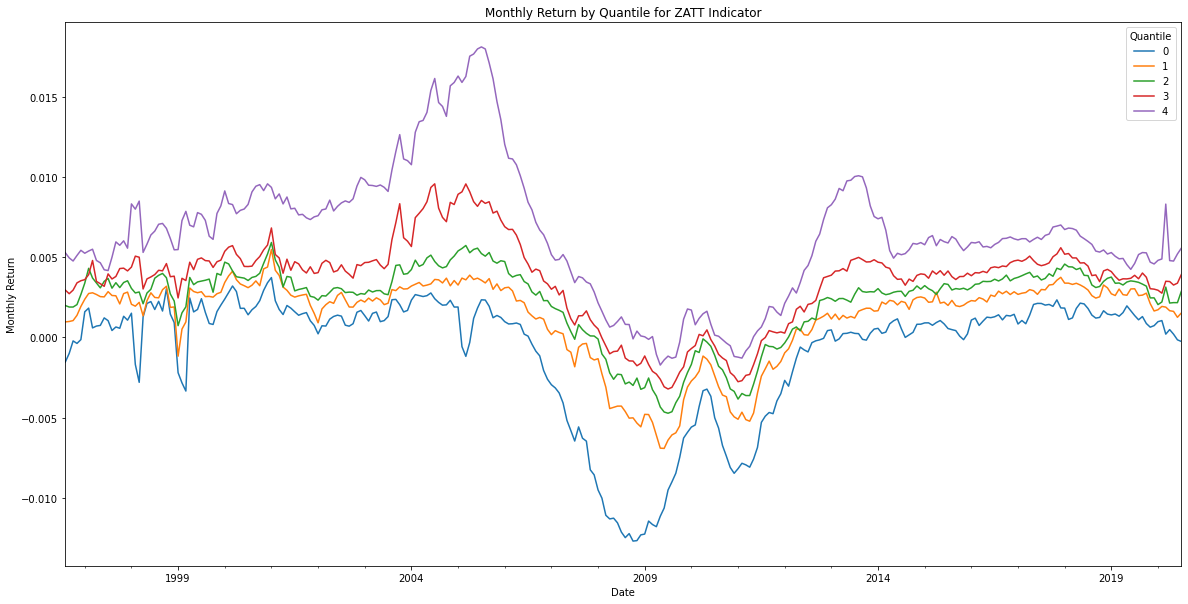

<Figure size 432x288 with 0 Axes>

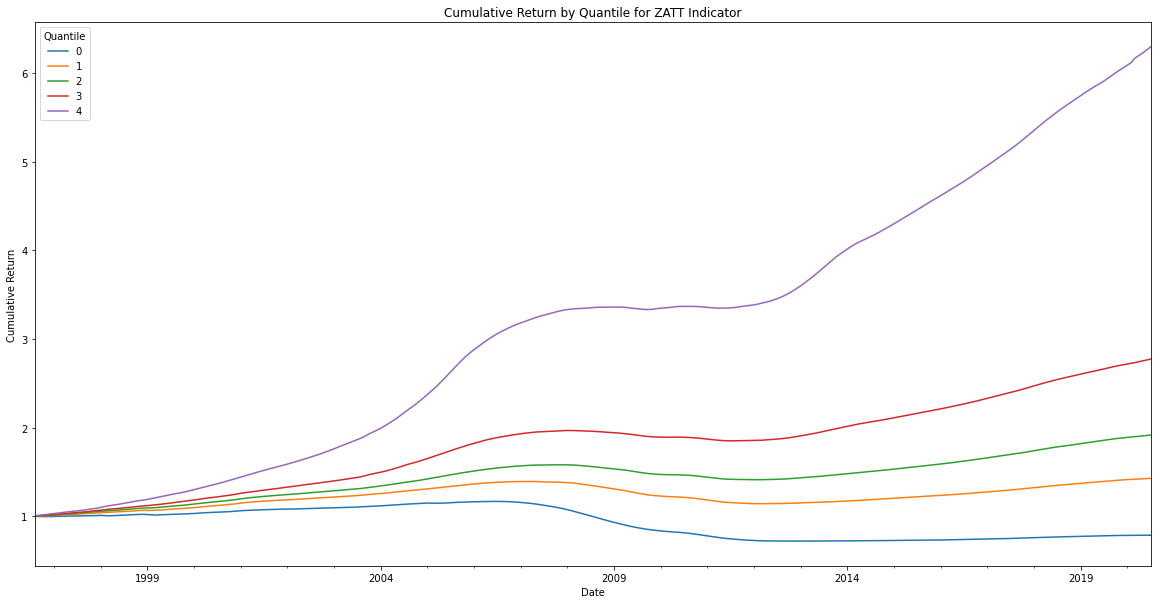

<Figure size 432x288 with 0 Axes>

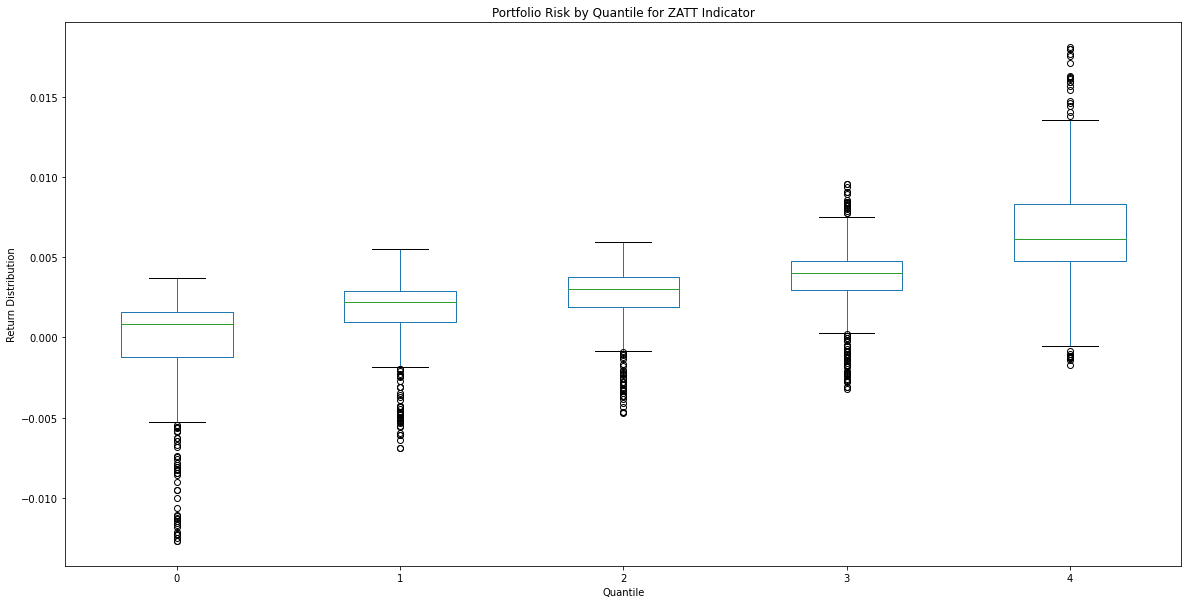

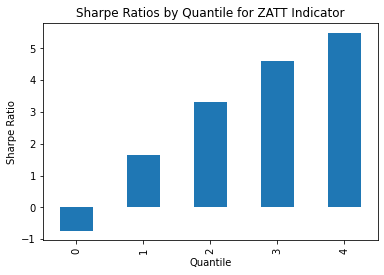

<Figure size 432x288 with 0 Axes>

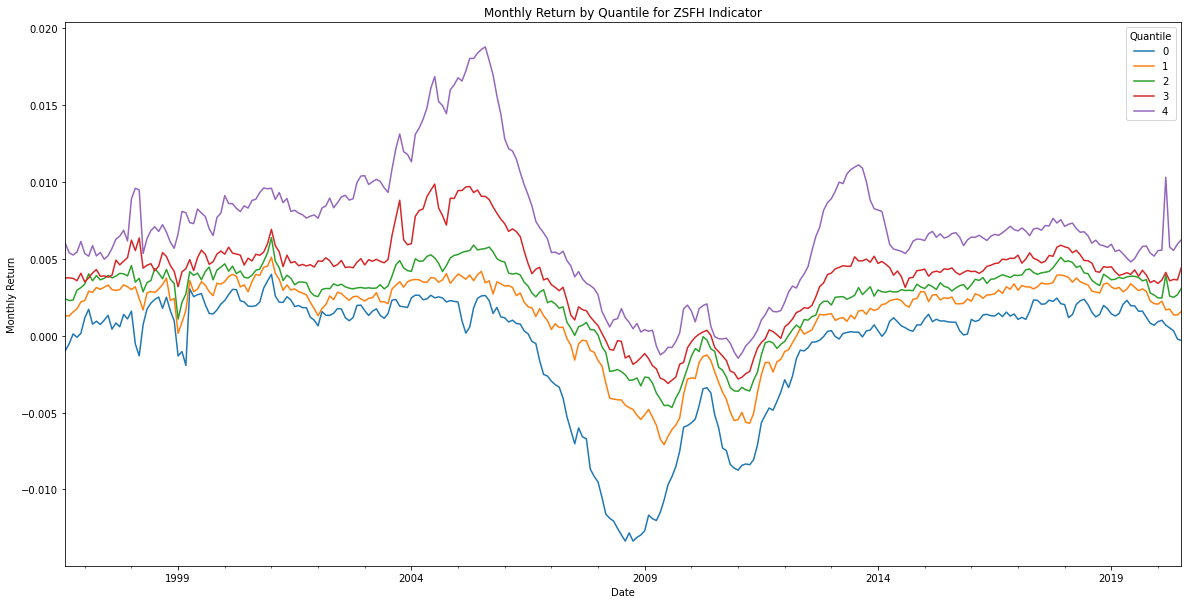

<Figure size 432x288 with 0 Axes>

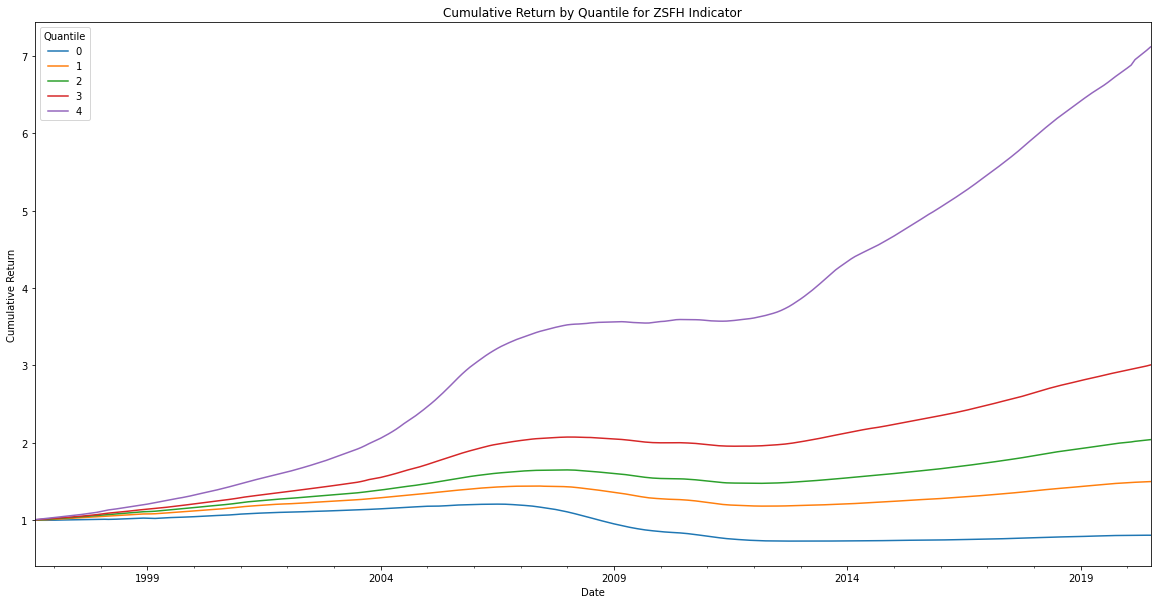

<Figure size 432x288 with 0 Axes>

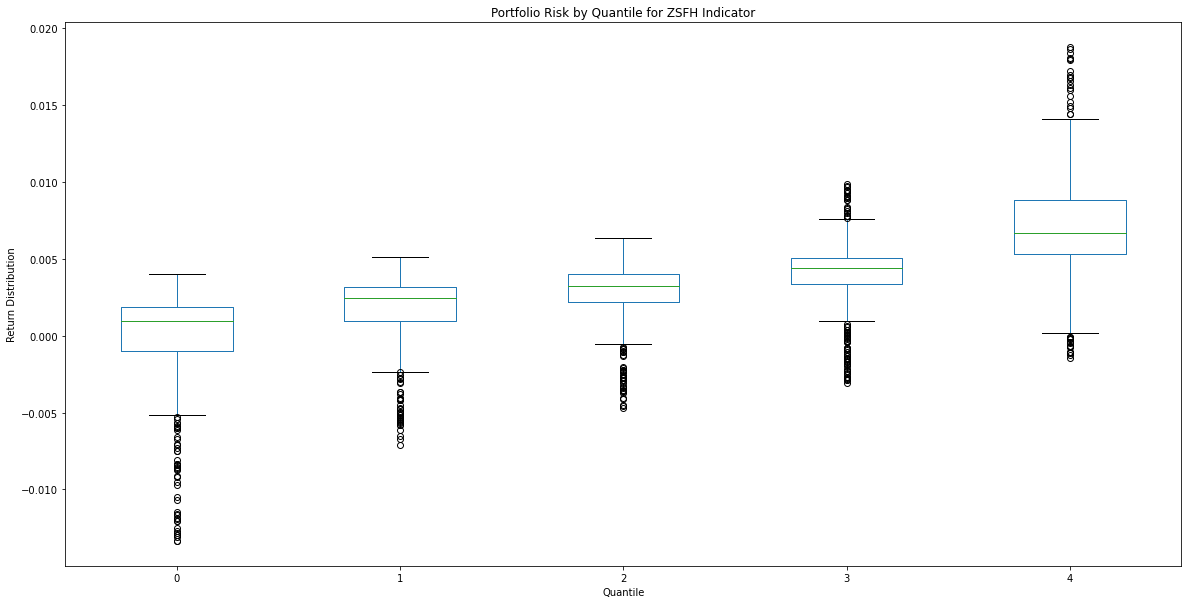

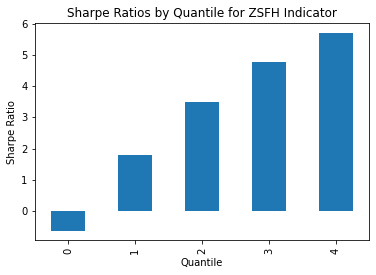

<Figure size 432x288 with 0 Axes>

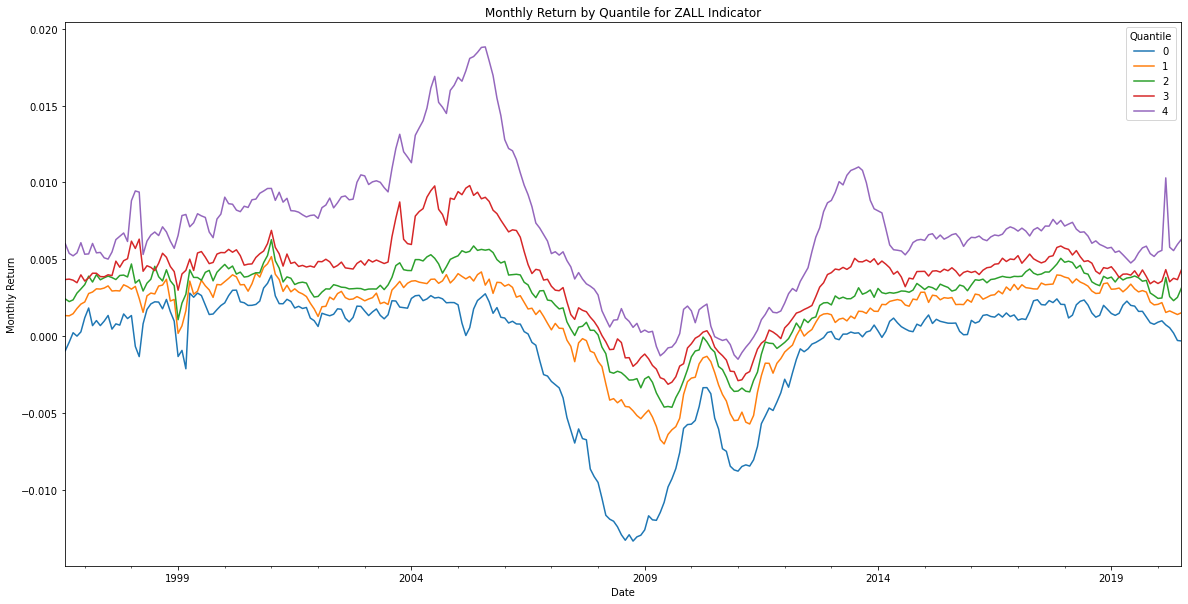

<Figure size 432x288 with 0 Axes>

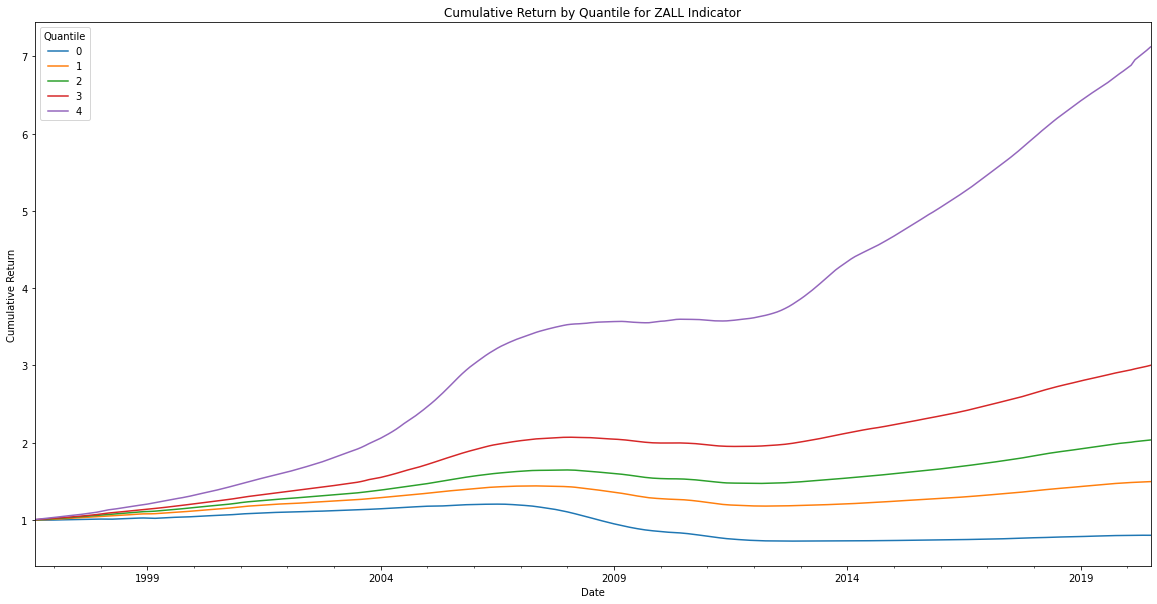

<Figure size 432x288 with 0 Axes>

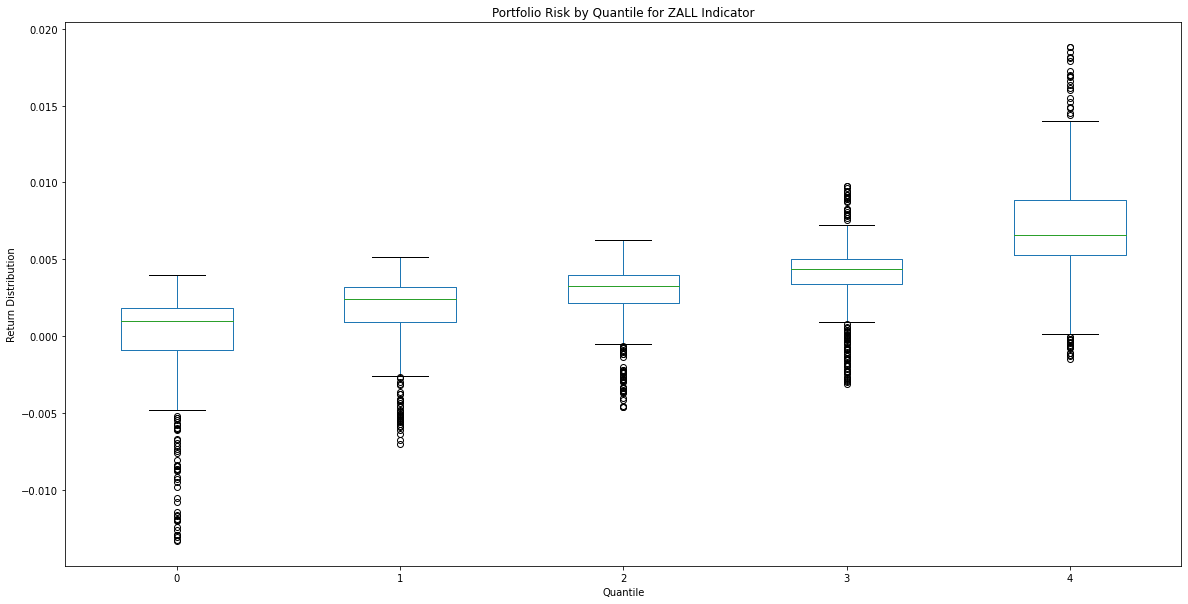

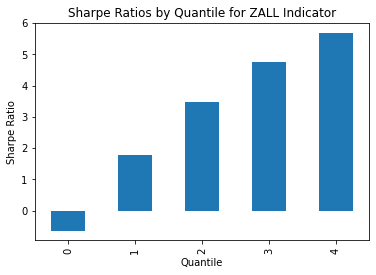

<Figure size 432x288 with 0 Axes>

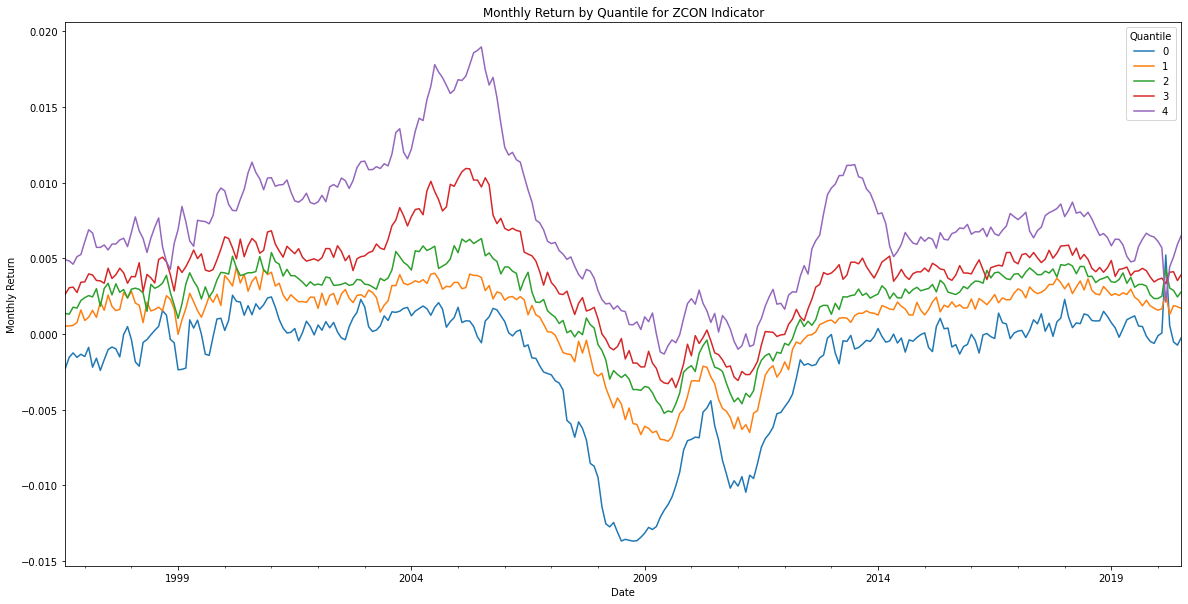

<Figure size 432x288 with 0 Axes>

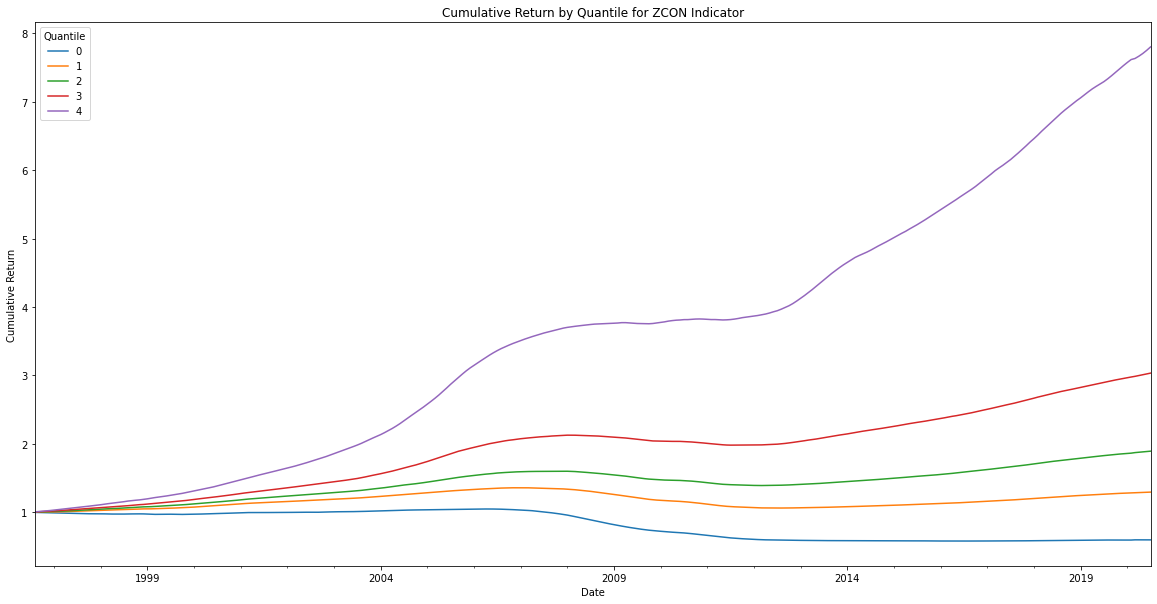

<Figure size 432x288 with 0 Axes>

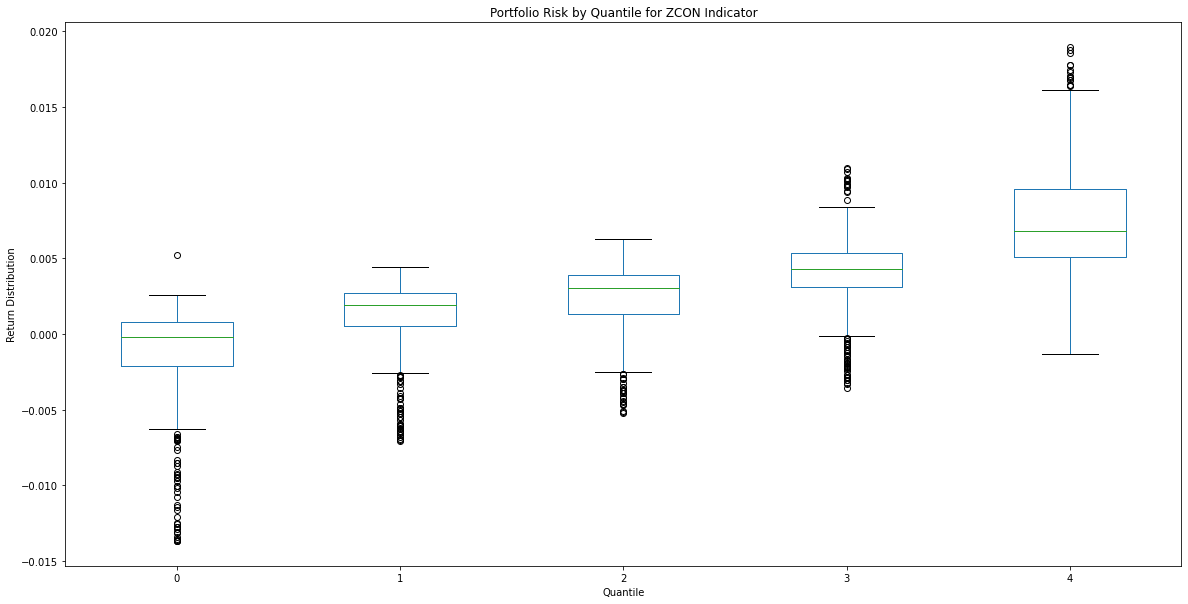

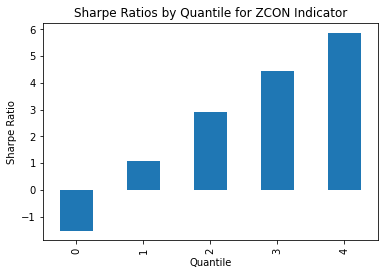

<Figure size 432x288 with 0 Axes>

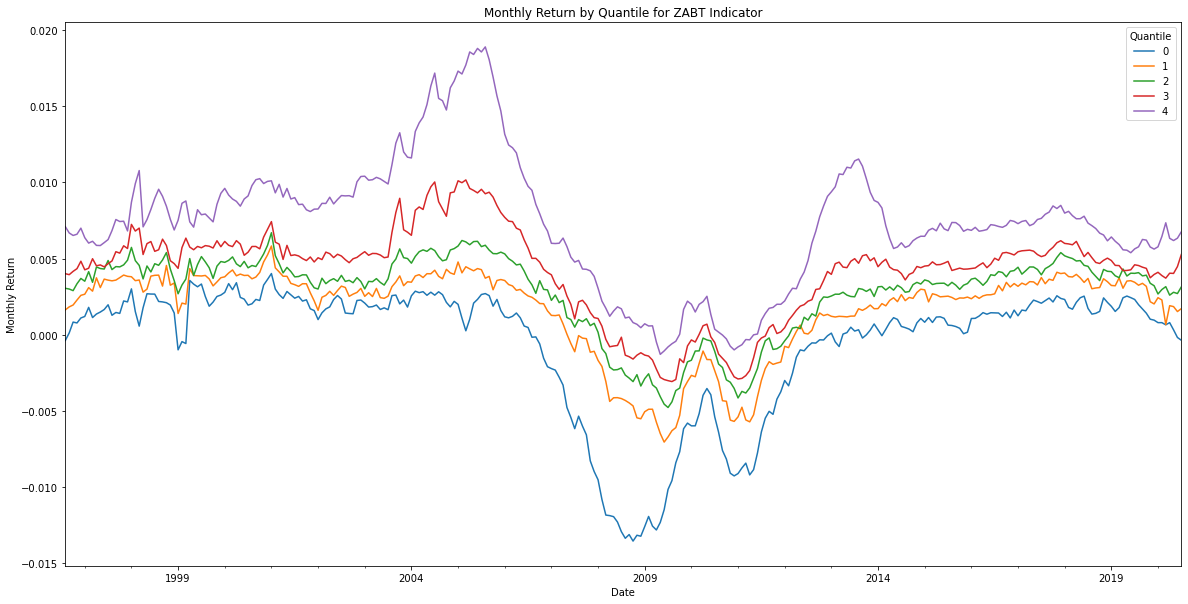

<Figure size 432x288 with 0 Axes>

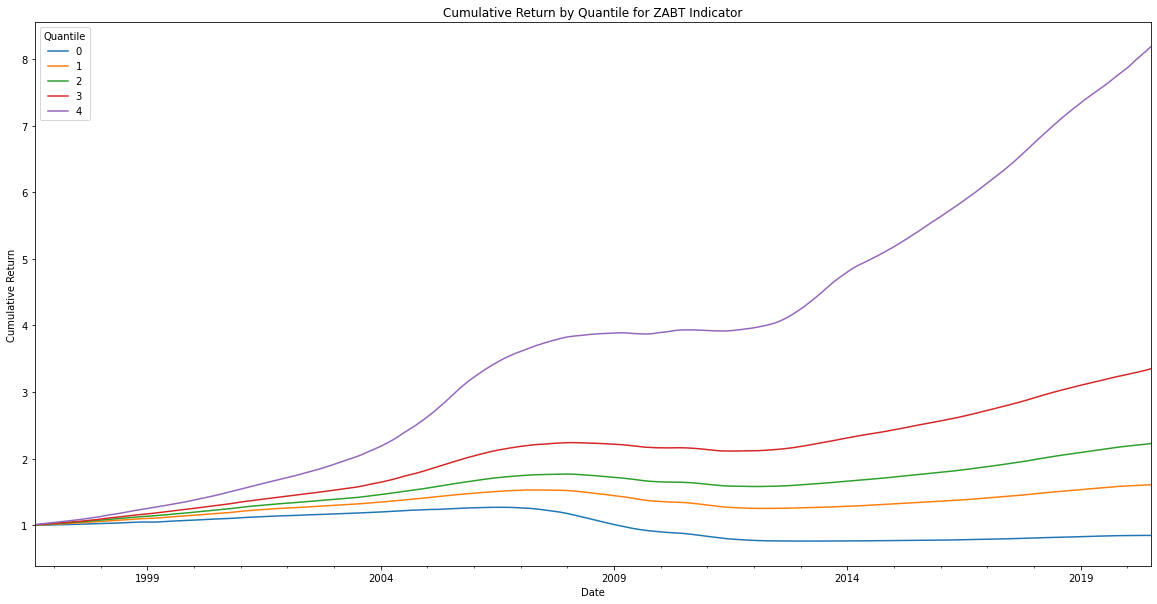

<Figure size 432x288 with 0 Axes>

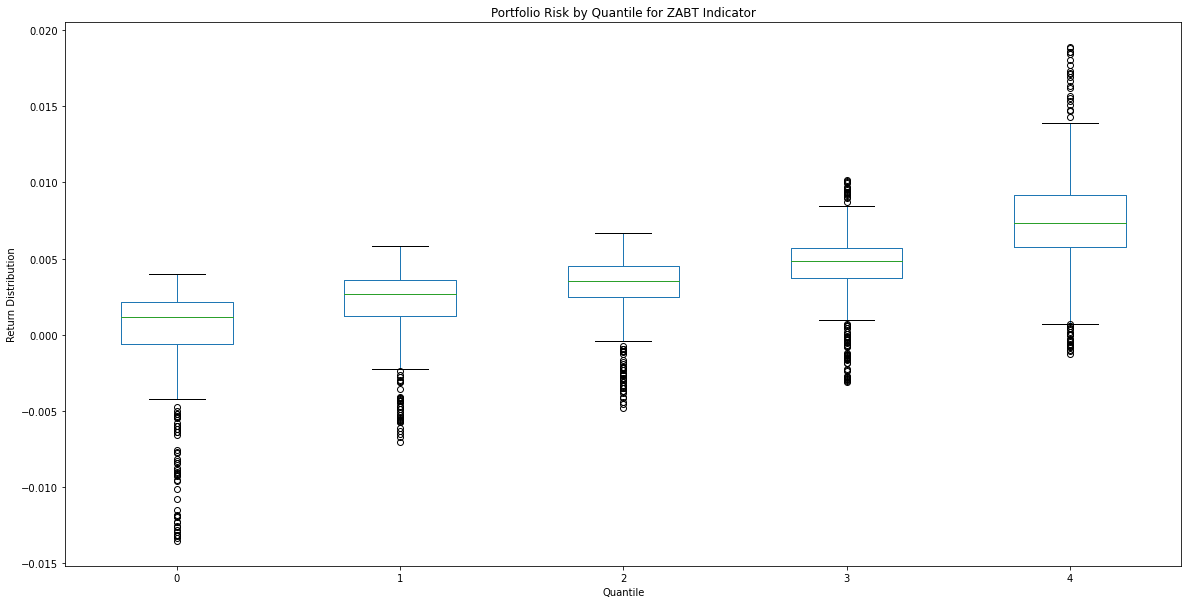

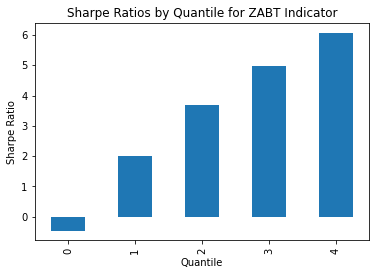

<Figure size 432x288 with 0 Axes>

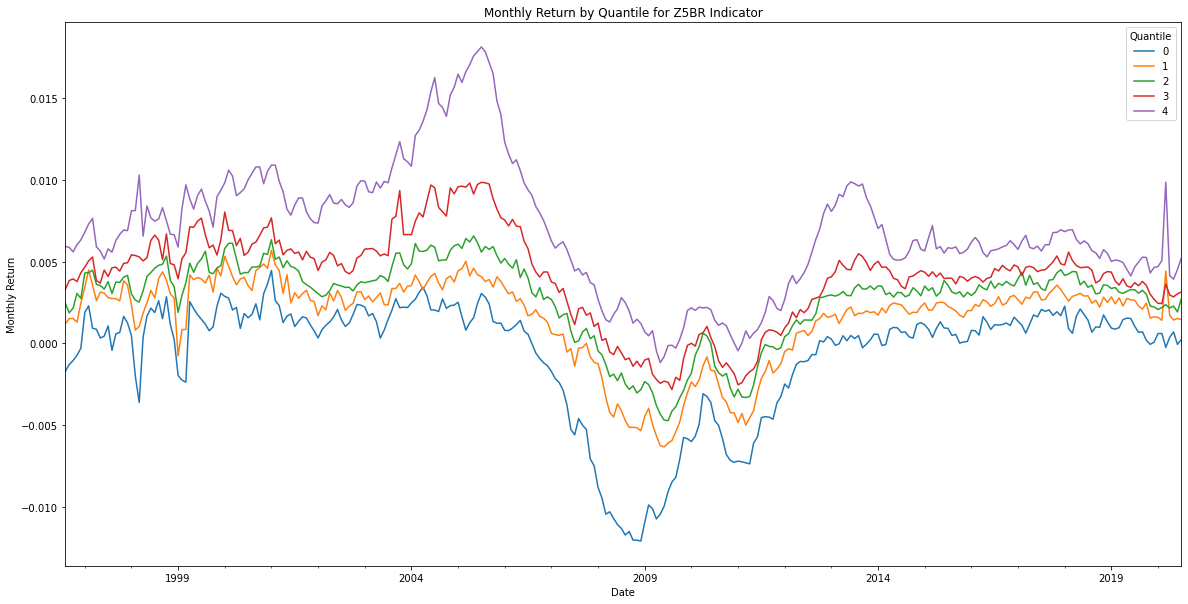

<Figure size 432x288 with 0 Axes>

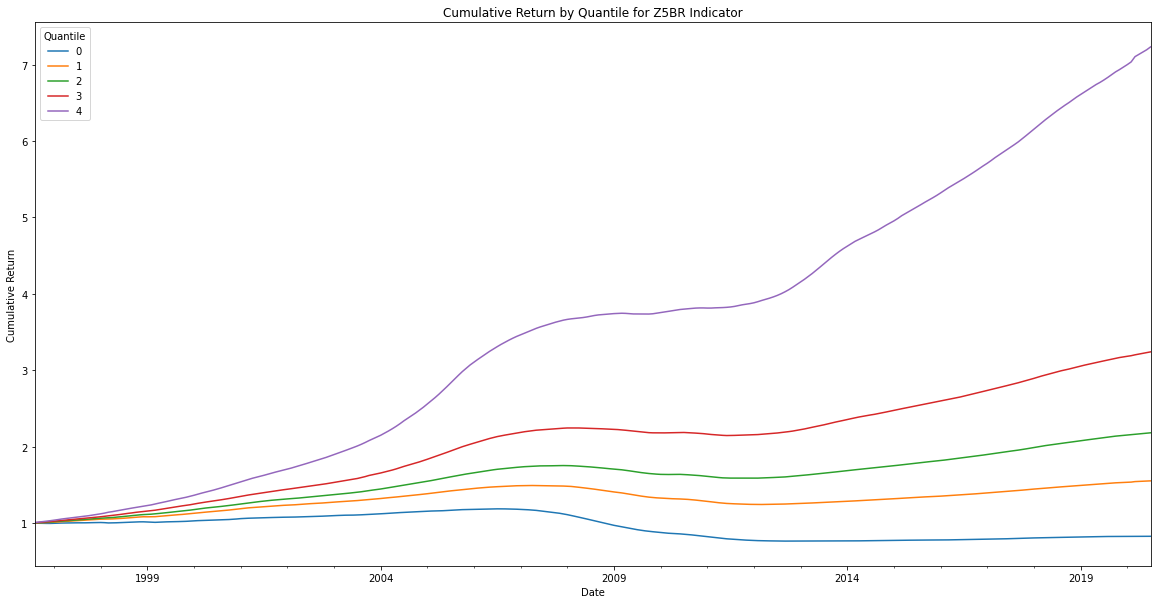

<Figure size 432x288 with 0 Axes>

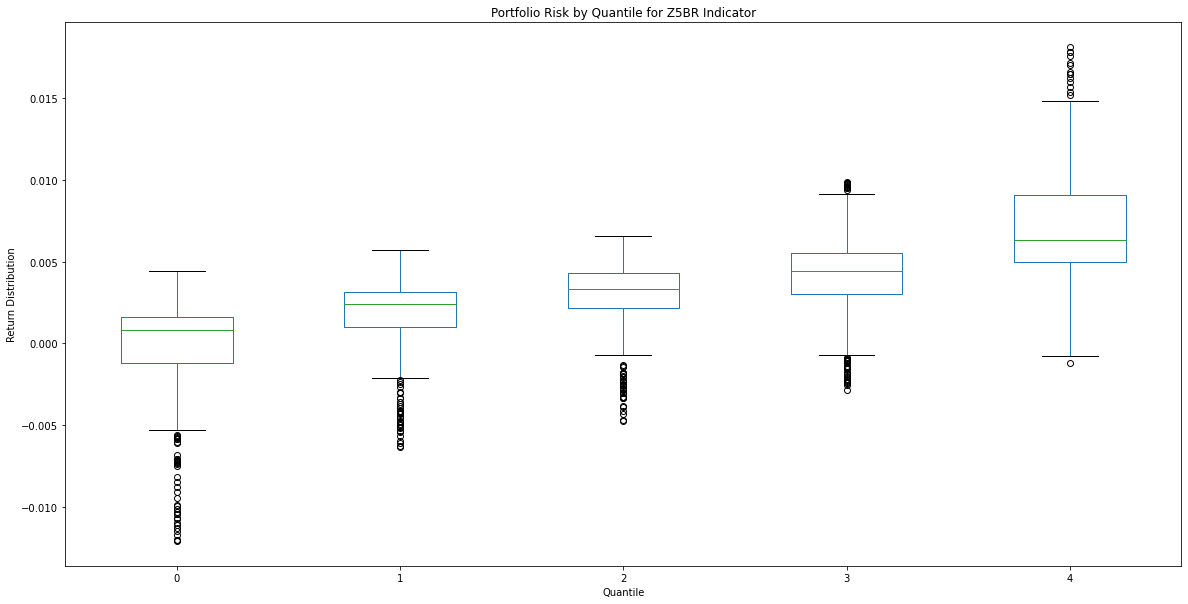

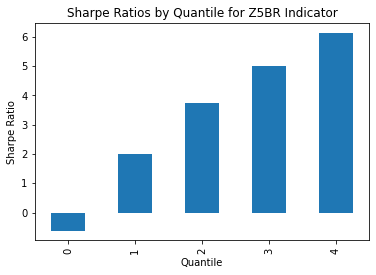

<Figure size 432x288 with 0 Axes>

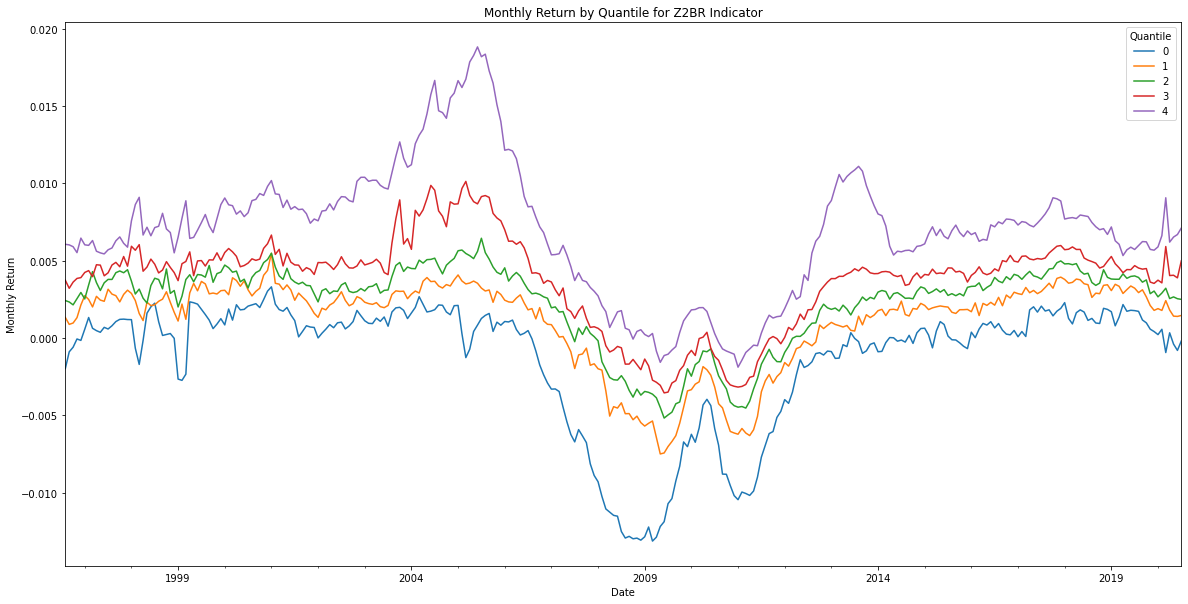

<Figure size 432x288 with 0 Axes>

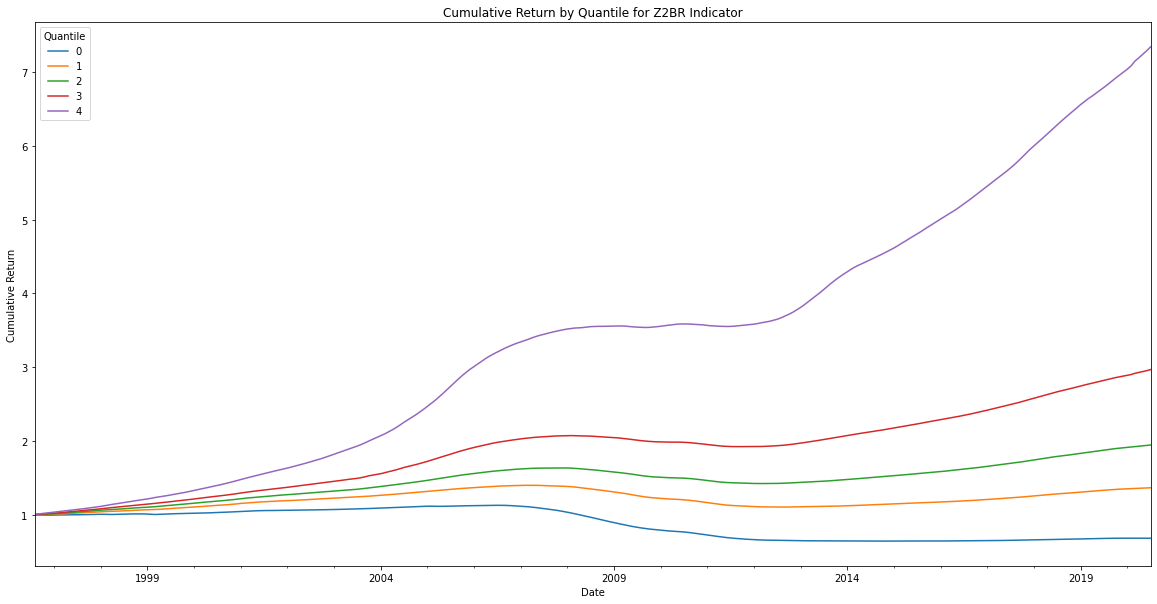

<Figure size 432x288 with 0 Axes>

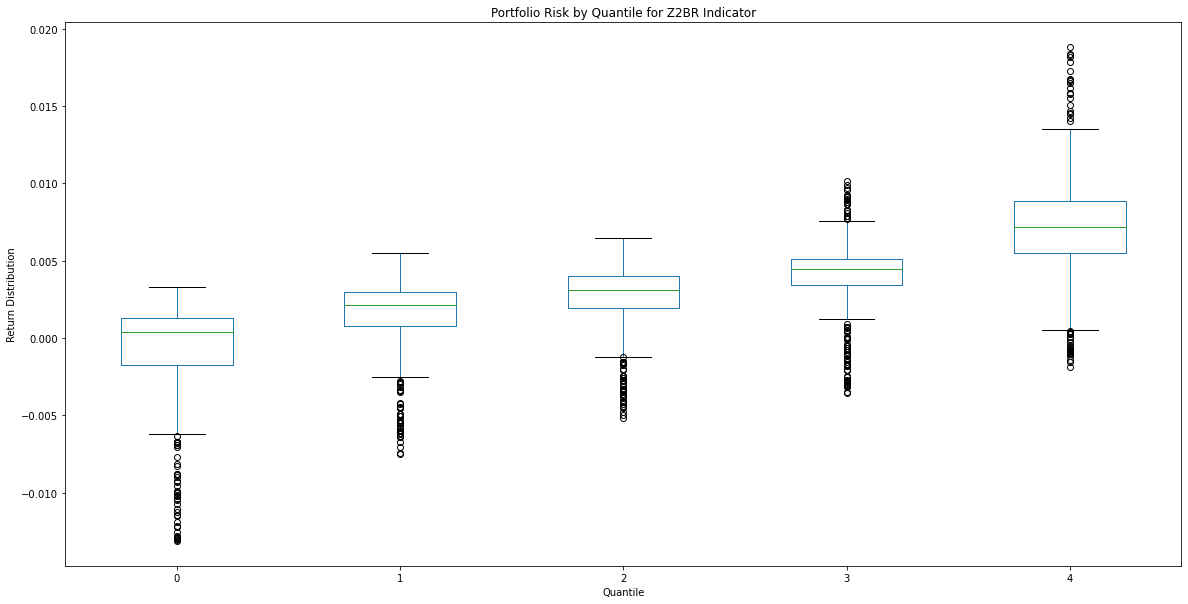

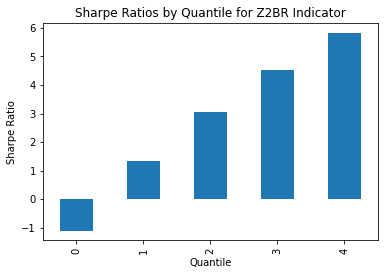

<Figure size 432x288 with 0 Axes>

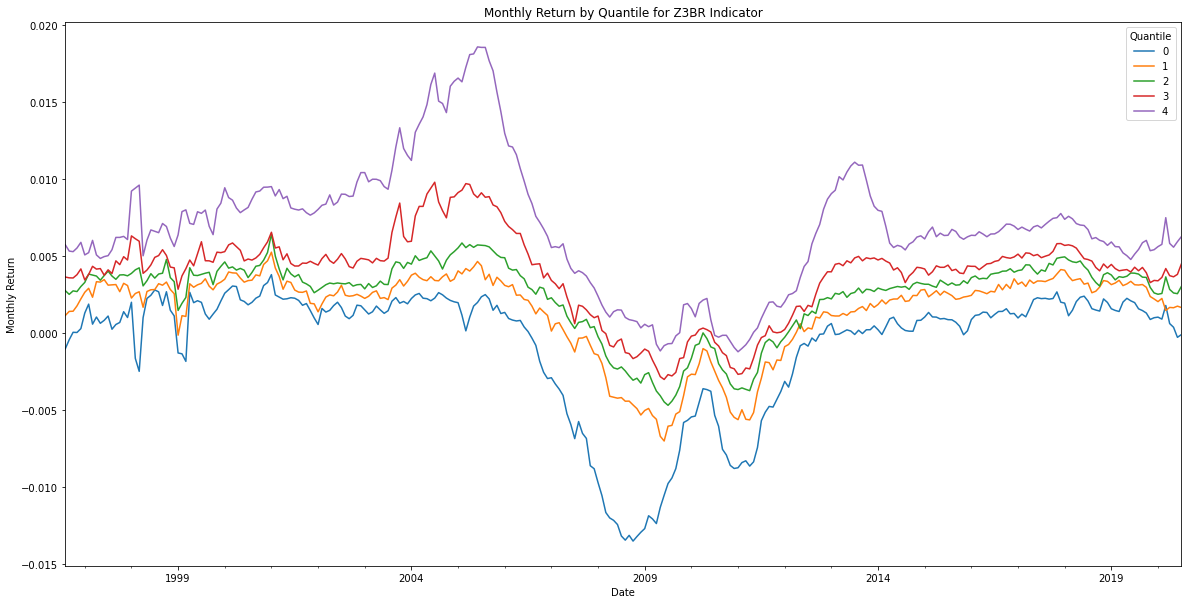

<Figure size 432x288 with 0 Axes>

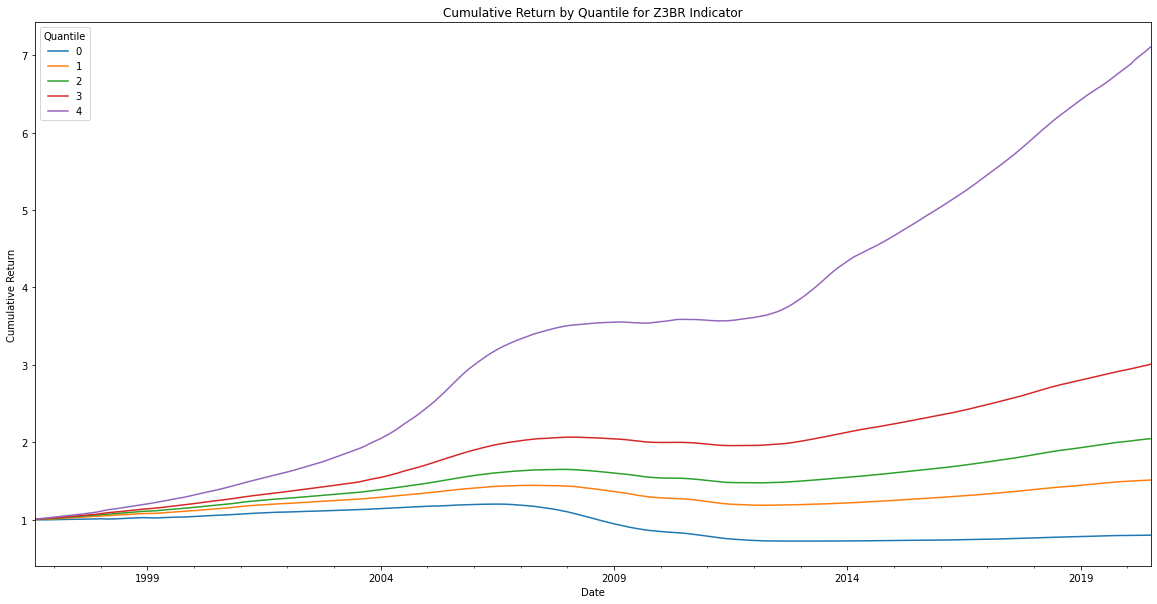

<Figure size 432x288 with 0 Axes>

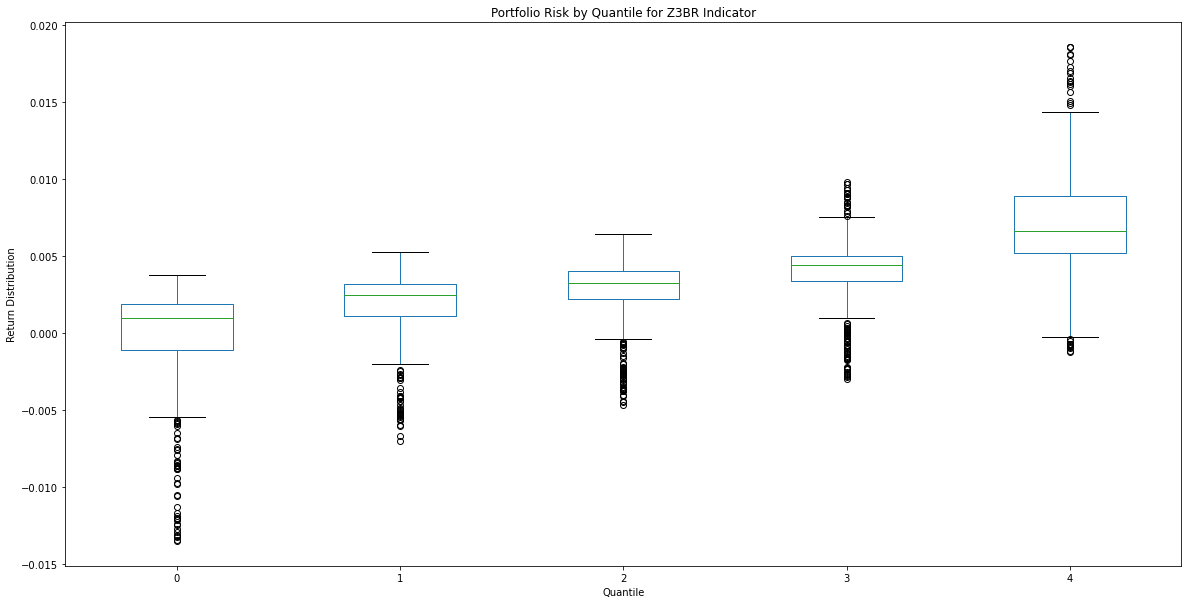

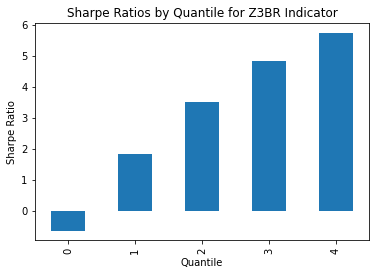

<Figure size 432x288 with 0 Axes>

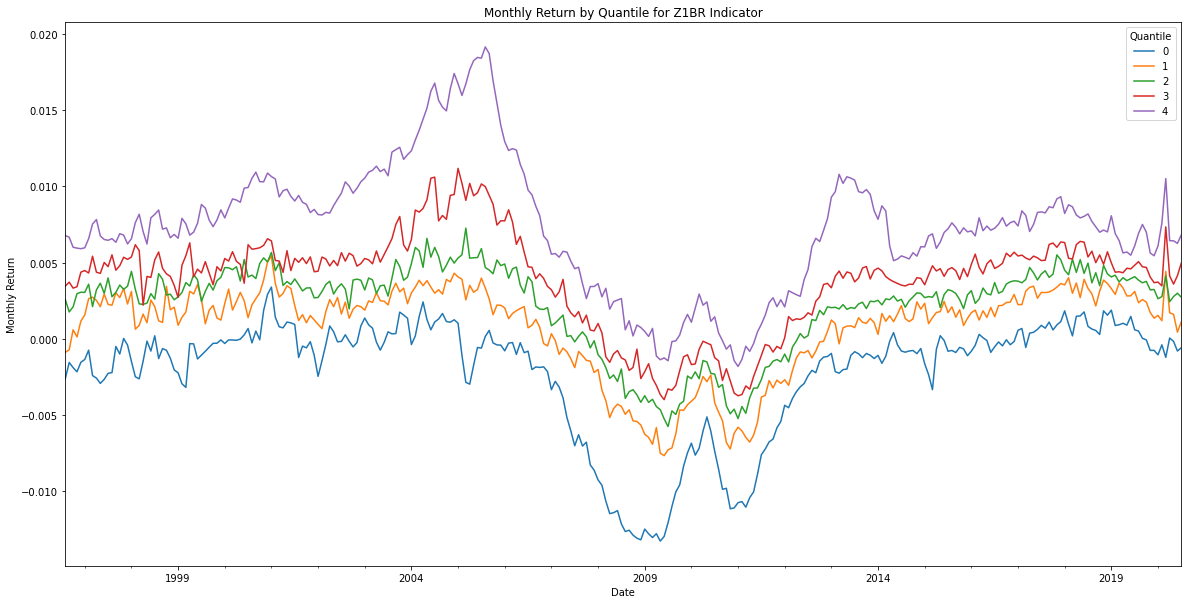

<Figure size 432x288 with 0 Axes>

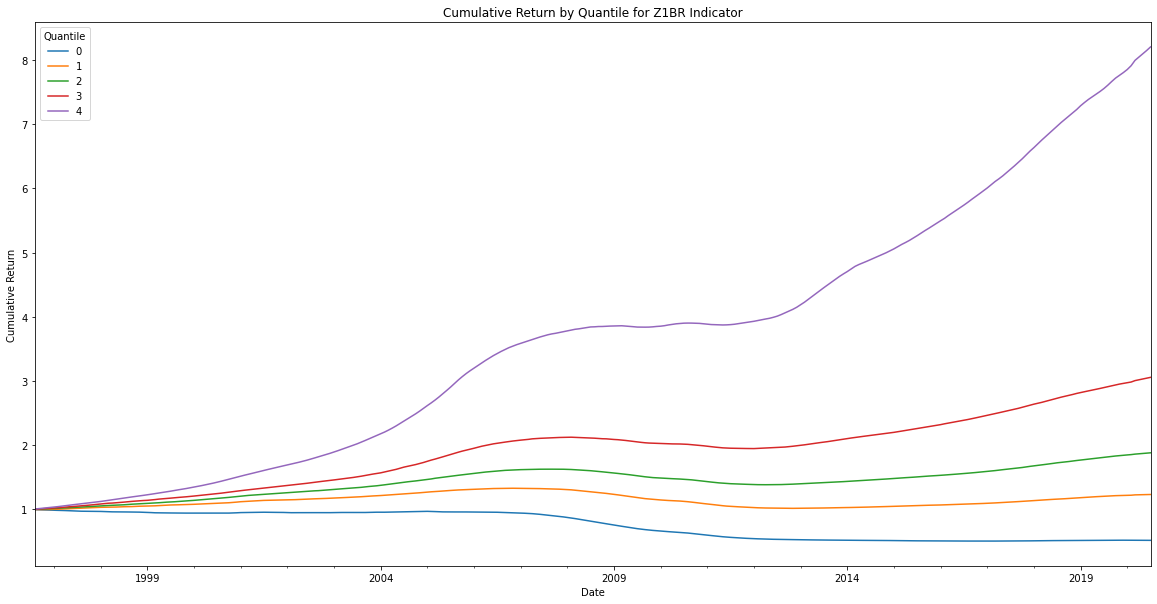

<Figure size 432x288 with 0 Axes>

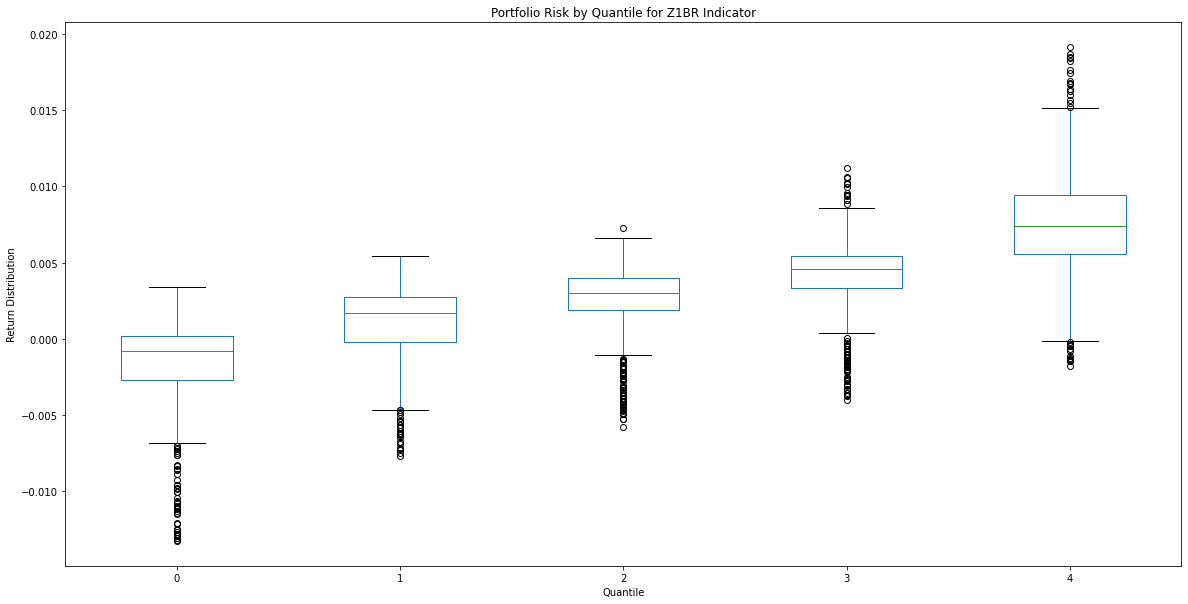

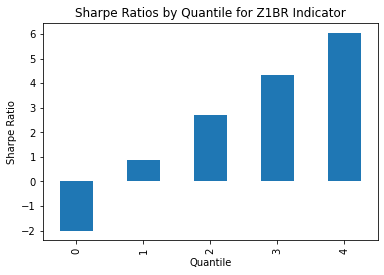

<Figure size 432x288 with 0 Axes>

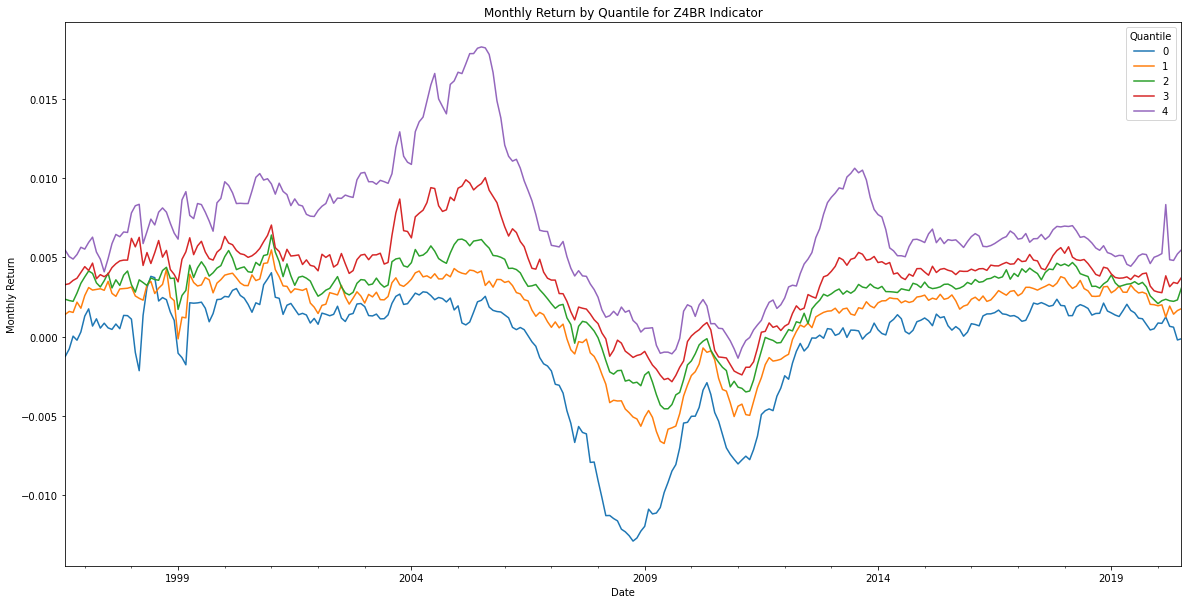

<Figure size 432x288 with 0 Axes>

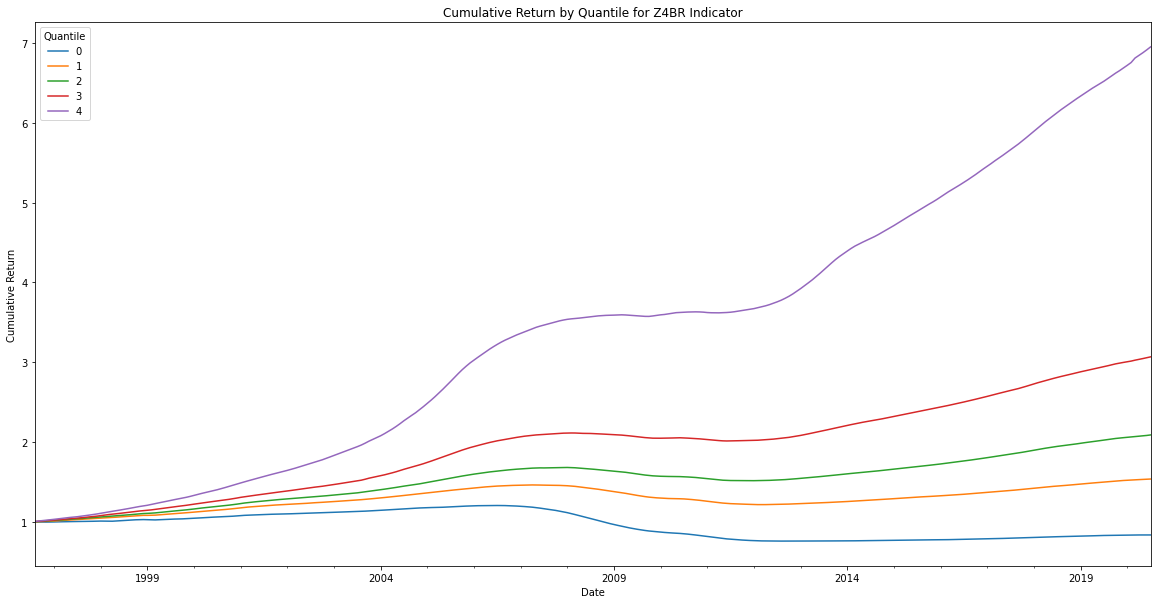

<Figure size 432x288 with 0 Axes>

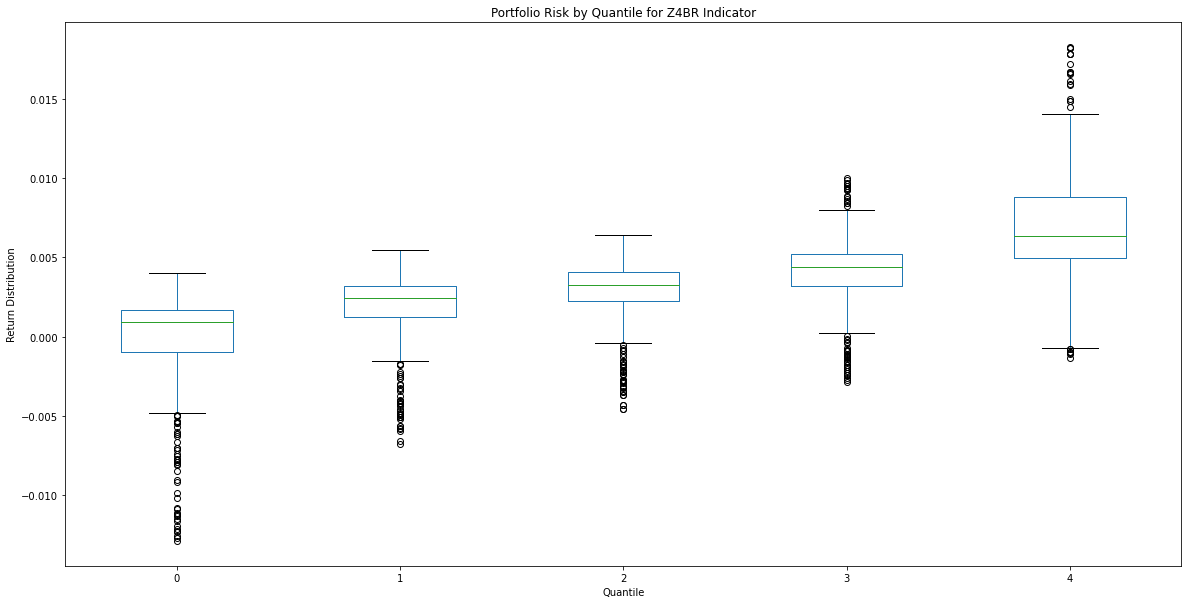

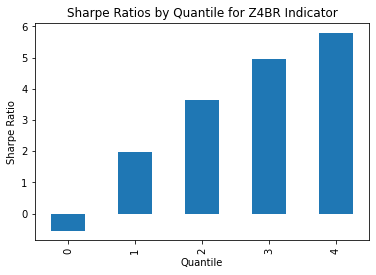

In [36]:
#Run function for all ZHVI Subsets
momentum_results = momentum(id_list,region)

### Momentum Function Outputs

In [37]:
#define function to print bold titles
def printmd(string):
    display(Markdown(string))

In [38]:
#Monthly Standard Deviation
printmd('**Momentum: Monthly Standard Deviation**')
M_month_stdev = momentum_results[0].sort_index().style.background_gradient(cmap="coolwarm")
display(M_month_stdev)

**Momentum: Monthly Standard Deviation**

In [39]:
#Annualized Standard Deviation
printmd('**Momentum: Annualized Standard Deviation**')
M_annual_stdev = momentum_results[1].sort_index().style.background_gradient(cmap="coolwarm")
display(M_annual_stdev)

**Momentum: Annualized Standard Deviation**

In [40]:
#Annualized Sharpe Ratios
printmd('**Momentum: Sharpe Ratios**')
M_sharpe_ratio = momentum_results[2].sort_index().style.background_gradient(cmap="autumn")
display(M_sharpe_ratio)

**Momentum: Sharpe Ratios**

In [41]:
#Save above tables to Excel file
with pd.ExcelWriter('momentum_all_indicators.xlsx') as writer:
    M_month_stdev.to_excel(writer, sheet_name='Month STDEV')
    M_annual_stdev.to_excel(writer, sheet_name='Annual STDEV')
    M_sharpe_ratio.to_excel(writer, sheet_name='Sharpe Ratios')

In [42]:
#Check processing time for momentum signal
end_time_2 = time.time()
print("The run time for the momentum calculations is "+str(round(((end_time_2-start_time_2)/60),2))+" minutes")

The run time for the momentum calculations is 2.25 minutes


# Value Signal

In [43]:
#start timer for value
start_time_3 = time.time()

In [44]:
# Define Value Function
def value (price_indicator, rent_indicator, region):
    '''
    * Function takes a list of price indicator ids, one rent indicator, and one region type 
    * The function iterates through list of indicators, selecting a subset of data based on the indicator and region type.
    * It then goes through the math to calculate the VALUE matrics
    * Then the function returns the results of the analysis, including:
        1. Line graph of monthly returns by quantile
        2. Line graph of cumulative return by quantile
        3. Boxplot of monthly return by quantile
        4. Sorted barchart of the sharpe Ratios for each quantile
        5. Correlation Matrix for correlation between all quantiles
        
    *The plots will be saved in the current working directory, and an excel workbook the tables for each indicator
    *Lastly, the function will return three tables of summary statistics that includes all indicators, the tables are:
        1. Monthly standard deviation
        2. Annualized standard deviation
        3. Sharpe ratios
    '''
    ##############################################################################################
    
    #Create blank dataframes to compare results of each indicator subset
    sharpe_ratios_value = pd.DataFrame()
    std_dev_value = pd.DataFrame()
    annual_std_Dev_value = pd.DataFrame()
    
    #Start with first indicator in list
    counter = 0
    ##############################################################################################
    
    #Loop
    while counter < len(price_indicator):
        print("Starting subset Analysis for "+ price_indicator[counter] +", "+rent_indicator+", and " + region)
        
        ##############################################################################################
        #define price subset
        price_subset = data[(data['indicator_id']== price_indicator[counter]) & (data['region_type']== region)]
        price_subset['date'] = pd.to_datetime(price_subset['date'], infer_datetime_format=True)
        
        
        ##############################################################################################
        #define rent subset
        rent_subset = pd.DataFrame(data[(data['indicator_id'] == rent_indicator)&(data['region_type'] == region)])
        rent_subset['date'] = pd.to_datetime(rent_subset['date'], infer_datetime_format=True)
        
        ##############################################################################################
        #define the price + rent subset
        price_rent = price_subset.merge(rent_subset[['region_id','date','value']],left_on=['region_id','date'],right_on = ['region_id','date'])
        
        #rename housing price and rent price after merge
        price_rent = price_rent.rename(columns={"value_x":"Price","value_y":"Rent"})
        
        #date feature to date time format
        price_rent['date'] = pd.to_datetime(price_rent['date'], infer_datetime_format=True)

        #Sort by dates
        price_rent = price_rent.sort_values(by = ['date'])
        
        
        ##############################################################################################
        #calculate rent to price
        price_rent["rent_to_price"] = price_rent["Rent"]/price_rent["Price"]
        
        #Set a multi index for time and location 
        price_rent = price_rent.set_index(['date','region_id'])['rent_to_price'].unstack(level=1)
        
        ##############################################################################################
        #calculate monthly change
        monthly_change = price_rent.pct_change(1)
        monthly_change = pd.DataFrame(monthly_change.stack())#transform into one dimension

        ##############################################################################################        
        #create signal to build portfolios from (6 month change)
        price_rent_pct = price_rent.pct_change(6).shift(1) ###change here###
        
        #Rank signals
        price_rent_pct.rank(axis = 1)
        
        #transform into one dimension
        price_rent_pct = pd.DataFrame(price_rent_pct.stack())
        
        #Name the signal column
        price_rent_pct.columns = ['Value Signal']
        
        #drop duplicates
        price_rent_pct = price_rent_pct.dropna().drop_duplicates()
        
        
        ##############################################################################################        
        #Create quantiles based on the signal. These quantiles are my portfolio's of regions with similar signals
        price_rent_pct["Quantile"] =  price_rent_pct.groupby(level='date')["Value Signal"].apply(pd.qcut, q=5, labels=False)
        
        #Append monthly change as Contemporaneous Returns to the value signal by quantile dataframe 
        price_rent_pct["Contemporaneous Returns"] = monthly_change
        
        #Lag quantile to avoid look ahead bias
        price_rent_pct["Quantile"] = price_rent_pct.groupby(level ='region_id')['Quantile'].shift(0)  ###change here###
        
        #Take average of the Contemporaneous Returns for each date and quantile group
        price_rent_pct = price_rent_pct.groupby(['date','Quantile'],as_index = True)['Contemporaneous Returns'].mean()
        
        #transform to multi dimension
        price_rent_pct = price_rent_pct.unstack(level= 1)

        
        
        #Plot Graph of returns by quantile
        ################################################################################################
        fig = plt.figure()
        fig = price_rent_pct.plot(figsize=(20,10))
        fig.set_title("Monthly Return by Quantile for "+ price_indicator[counter]+rent_indicator+" Indicators")
        fig.set_xlabel("Date")
        fig.set_ylabel("Monthly Return")
        fig.figure.savefig("MonthlyReturnQuantile"+price_indicator[counter]+rent_indicator+".png")
        plt_1 = fig

        #cumulative product of quantiles to force quantiles to have same starting point
        ##############################################################################################
        subset_cumret = (1+price_rent_pct).cumprod()
        
        #Save above to csv file
        subset_cumret.to_csv("CumulativeReturnQuantile"+price_indicator[counter]+rent_indicator+'.csv')

        #cumulative return plot
        ##############################################################################################
        fig = plt.figure()
        fig = subset_cumret.plot(figsize=(20,10))
        fig.set_title("Cumulative Return by Quantile for" + price_indicator[counter]+rent_indicator +" Indicators")
        fig.set_xlabel("Date")
        fig.set_ylabel("Cumulative Return")
        fig.figure.savefig("CumulativeReturnQuantile"+price_indicator[counter]+rent_indicator+".png")
        plt_2 = fig

        #Boxplot of return to visually compare risk between quantiles.
        ##############################################################################################
        fig = plt.figure()
        fig = price_rent_pct.plot.box(figsize=(20,10))
        fig.set_title("Portfolio Risk by Quantile for "+price_indicator[counter]+rent_indicator+" Indicators")
        fig.set_xlabel("Quantile")
        fig.set_ylabel("Return Distribution")
        fig.figure.savefig("BoxplotQuantileReturn"+price_indicator[counter]+rent_indicator+".png")
        plt_3 = fig

        #monthly standard deviation of returns by quantile
        #Smaller standard deviations indicate low volitility or low risk in a quantile.
        #Larger standard deviations indicate higher volatility or higher risk
        ##############################################################################################
        month_std = price_rent_pct.std().sort_values(ascending=False)
        std_dev_value.insert(counter,price_indicator[counter]+rent_indicator,month_std) #Append standard deviation to df
        

        #Caculate correlation between quantiles.
        ##############################################################################################
        #Lower correlation between quantiles indicates portfolio diversification and reduced risk
        corr_df = price_rent_pct.corr()
        corr_df.style.background_gradient(cmap="summer")

        #Calculate Annualized Standard Deviation. High std dev, high risk and vise versa
        ##############################################################################################
        annual_stdev = (price_rent_pct.std() * np.sqrt(12)).sort_values(ascending=False)
        annual_std_Dev_value.insert(counter,price_indicator[counter]+rent_indicator,annual_stdev) #Append annual standard deviation to df
        

        #Annualized Sharpe Ratios(return-to-risk ratio)
        ##############################################################################################
        sharpe_ratios = ((price_rent_pct.mean() * 12) / (price_rent_pct.std() * np.sqrt(12)))
        sharpe_ratios.sort_values(ascending=False)
        sharpe_ratios_value.insert(counter,price_indicator[counter]+rent_indicator,sharpe_ratios)

        # Visualize the sharpe ratios as a bar plot
        ##############################################################################################
        fig = plt.figure()
        fig = sharpe_ratios.sort_values().plot(kind="bar", title="Sharpe Ratios by Quantile for "+price_indicator[counter]+rent_indicator+" Indicators")
        fig.set_xlabel('Quantile')
        fig.set_ylabel('Sharpe Ratio')
        fig.figure.savefig("sharpe_ratios"+price_indicator[counter]+rent_indicator+".png")
        plt_4 = fig

        #Save tables to Excel file
        ##############################################################################################
        with pd.ExcelWriter(price_indicator[counter]+rent_indicator+region+'.xlsx') as writer:
            month_std.to_excel(writer, sheet_name='month_std_')
            corr_df.to_excel(writer, sheet_name='corr_df_')
            annual_stdev.to_excel(writer, sheet_name='annual_stdev_')
            sharpe_ratios.to_excel(writer,sheet_name='sharpe_ratios_')
            
            
        #Print what indicator is under analysis
        ##############################################################################################
        print("Finishing subset Analysis for "+ price_indicator[counter] +", "+rent_indicator+", and " + region)
        counter = counter + 1
    return std_dev_value, annual_std_Dev_value, sharpe_ratios_value

### Define inputs for value function

In [45]:
#Price indicator: use same 10 ZHVI indicators used in momentum calculation
price_indicator = id_list 

#Rent indicator: ZORI (Zillow rent index for all Homes Plus Multifamily. Time Series, Smoothed, Seasonally Adjusted)
rent_indicator = 'RSNA' 

#same region type as momentum
region = 'metro'

### Run Value function with defined inputs

Starting subset Analysis for ZATT, RSNA, and metro
Finishing subset Analysis for ZATT, RSNA, and metro
Starting subset Analysis for ZSFH, RSNA, and metro
Finishing subset Analysis for ZSFH, RSNA, and metro
Starting subset Analysis for ZALL, RSNA, and metro
Finishing subset Analysis for ZALL, RSNA, and metro
Starting subset Analysis for ZCON, RSNA, and metro
Finishing subset Analysis for ZCON, RSNA, and metro
Starting subset Analysis for ZABT, RSNA, and metro
Finishing subset Analysis for ZABT, RSNA, and metro
Starting subset Analysis for Z5BR, RSNA, and metro
Finishing subset Analysis for Z5BR, RSNA, and metro
Starting subset Analysis for Z2BR, RSNA, and metro
Finishing subset Analysis for Z2BR, RSNA, and metro
Starting subset Analysis for Z3BR, RSNA, and metro
Finishing subset Analysis for Z3BR, RSNA, and metro
Starting subset Analysis for Z1BR, RSNA, and metro
Finishing subset Analysis for Z1BR, RSNA, and metro
Starting subset Analysis for Z4BR, RSNA, and metro
Finishing subset Analy

<Figure size 432x288 with 0 Axes>

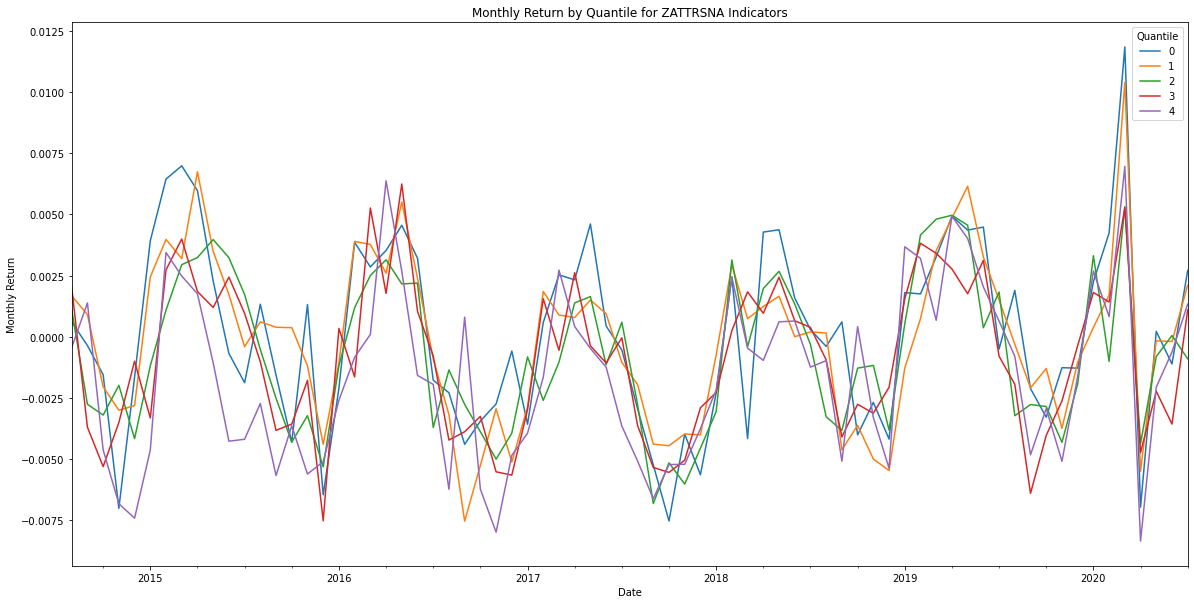

<Figure size 432x288 with 0 Axes>

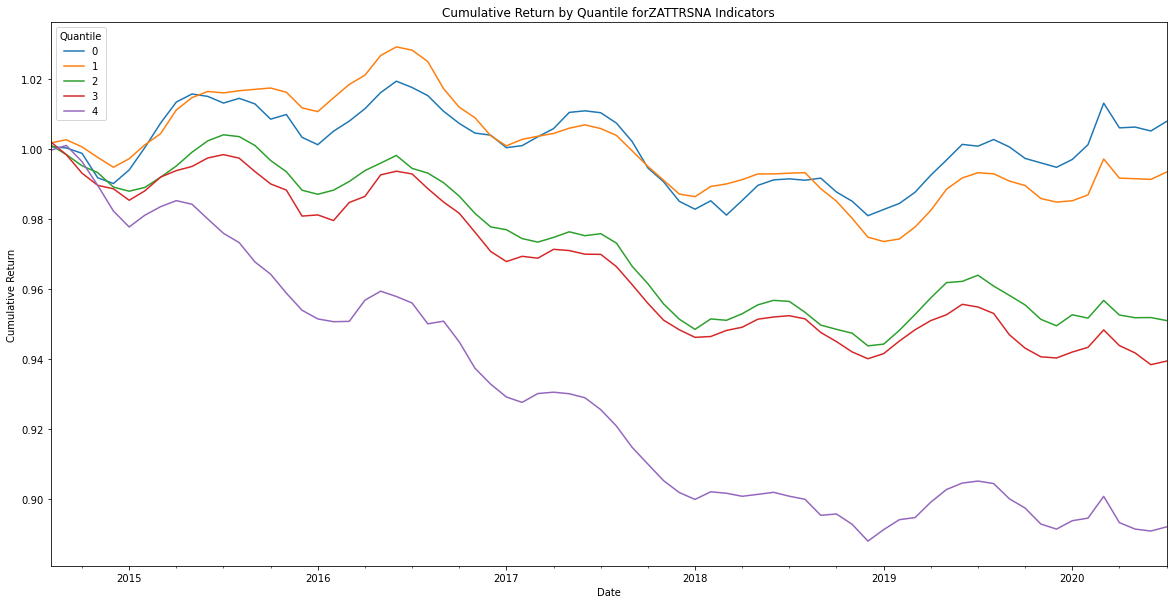

<Figure size 432x288 with 0 Axes>

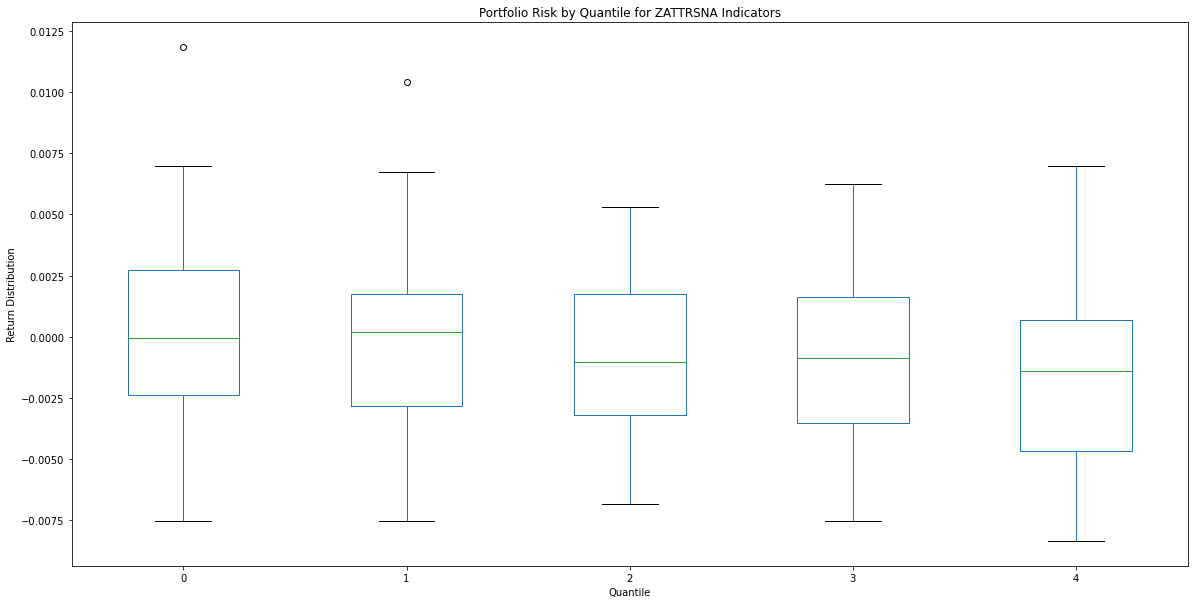

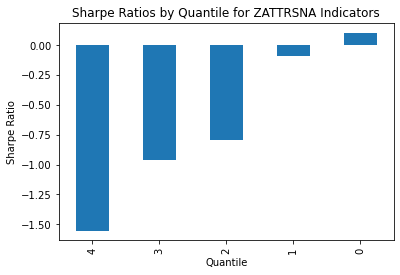

<Figure size 432x288 with 0 Axes>

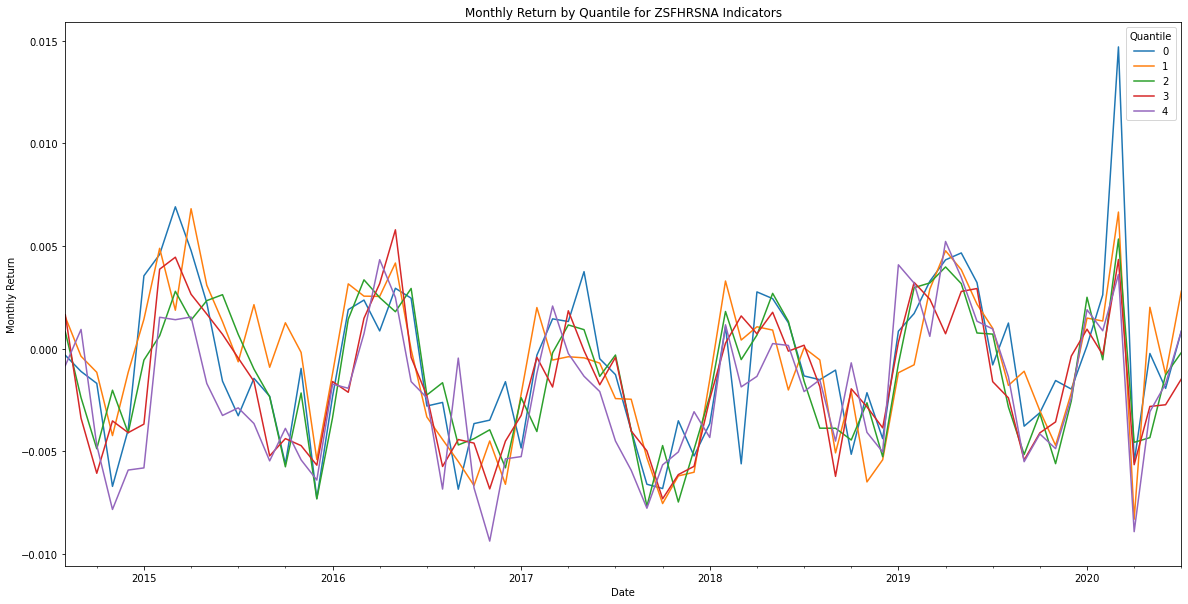

<Figure size 432x288 with 0 Axes>

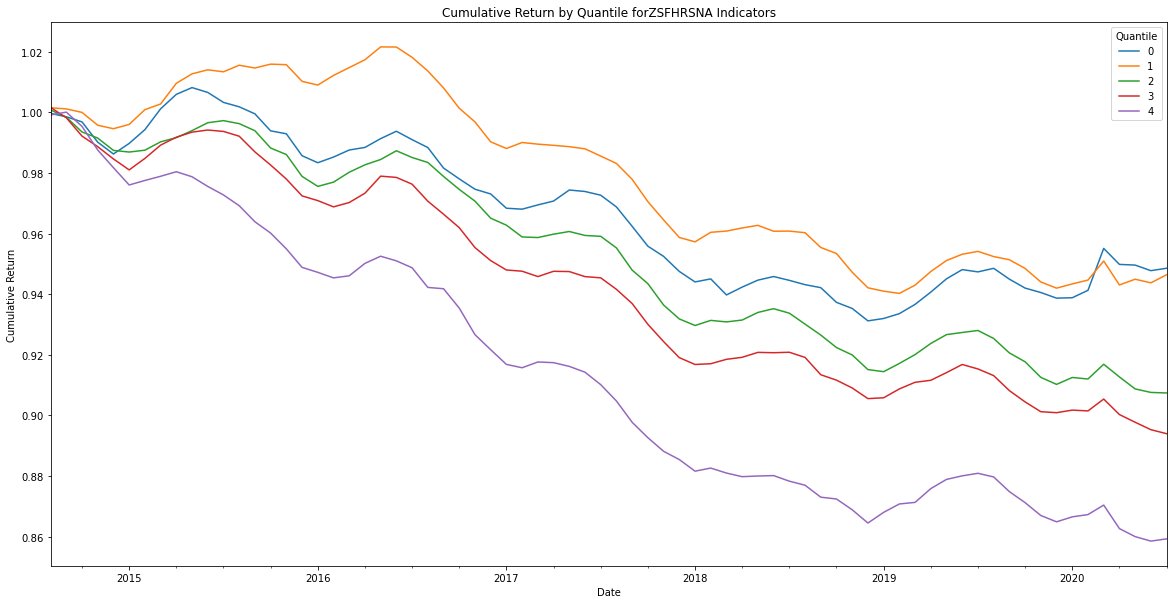

<Figure size 432x288 with 0 Axes>

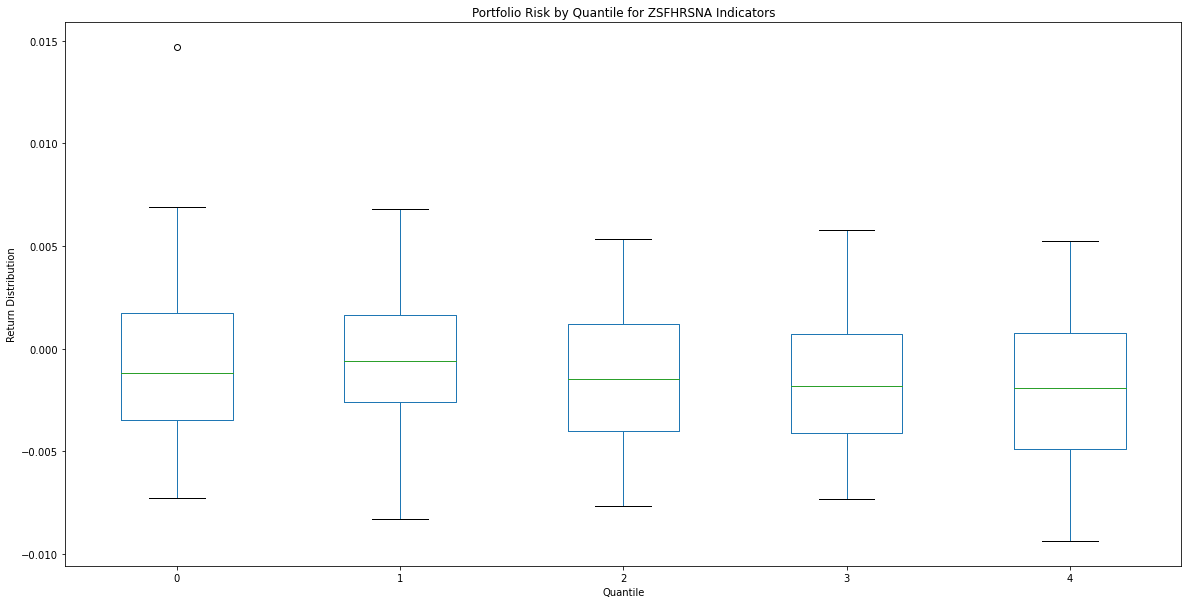

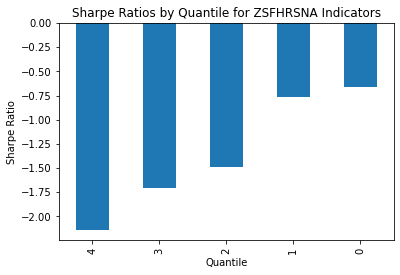

<Figure size 432x288 with 0 Axes>

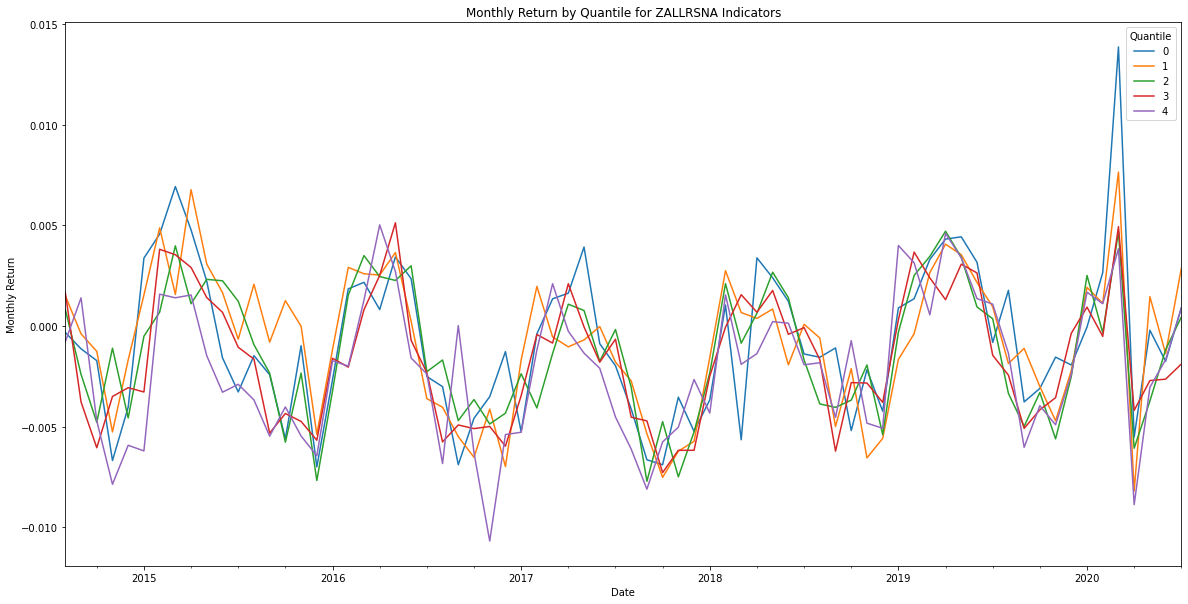

<Figure size 432x288 with 0 Axes>

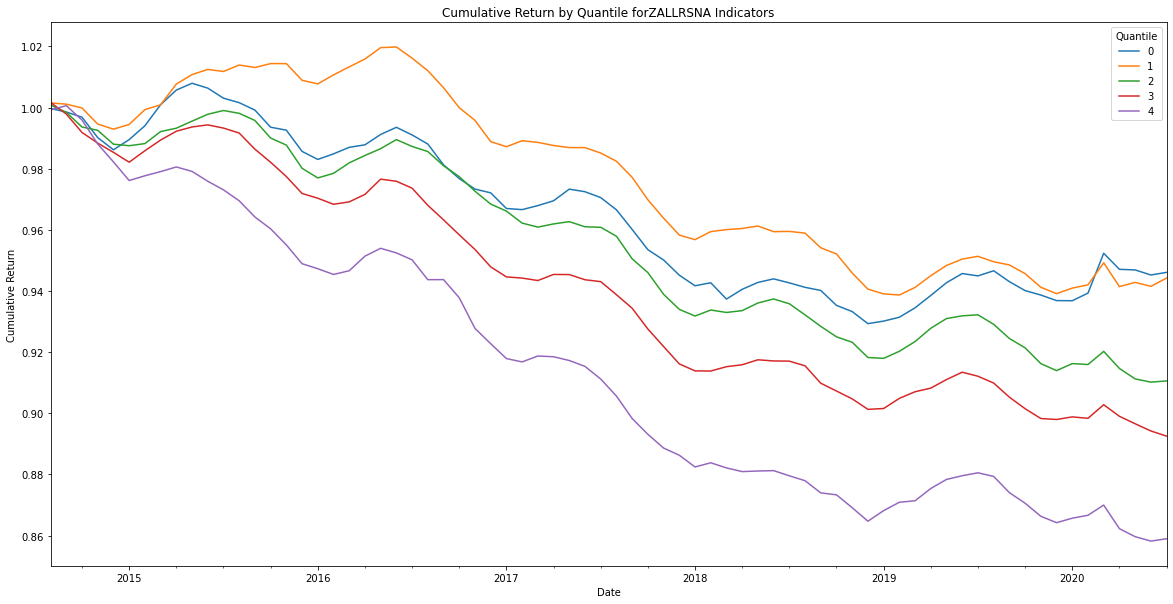

<Figure size 432x288 with 0 Axes>

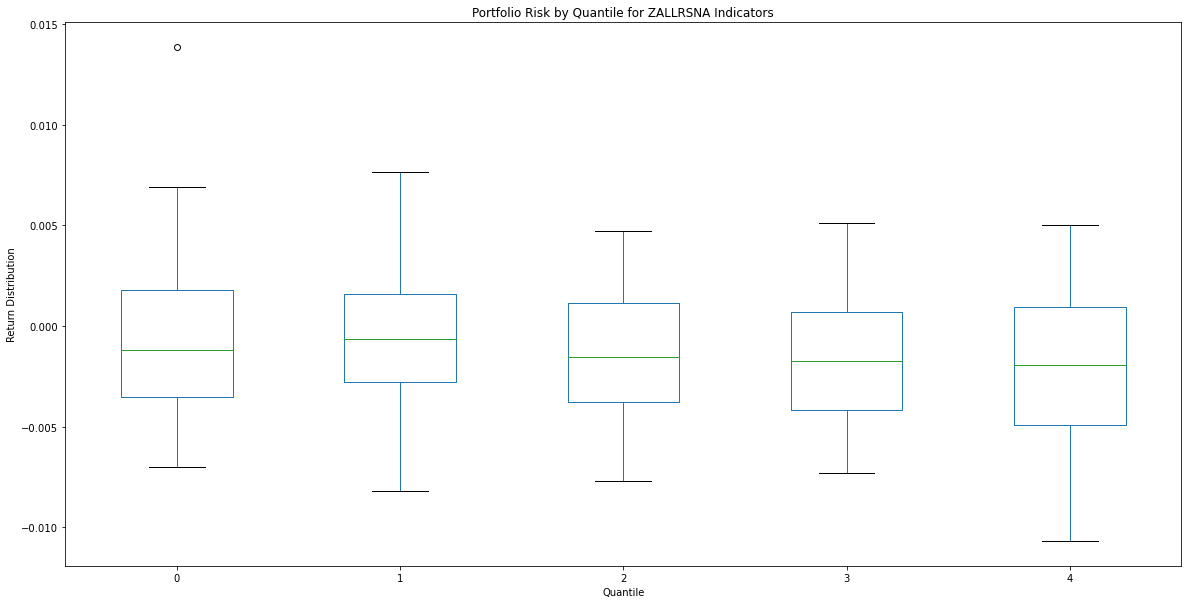

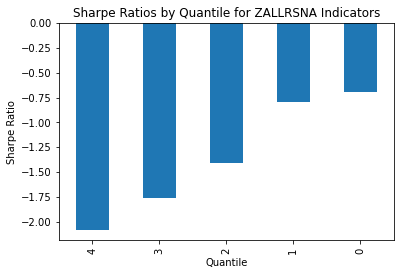

<Figure size 432x288 with 0 Axes>

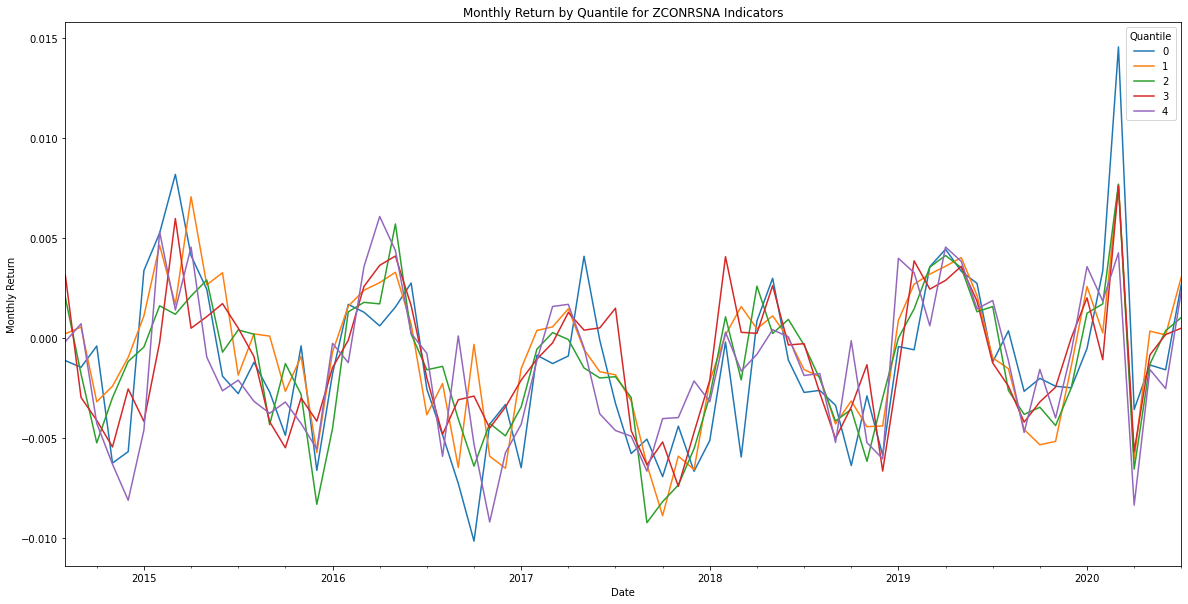

<Figure size 432x288 with 0 Axes>

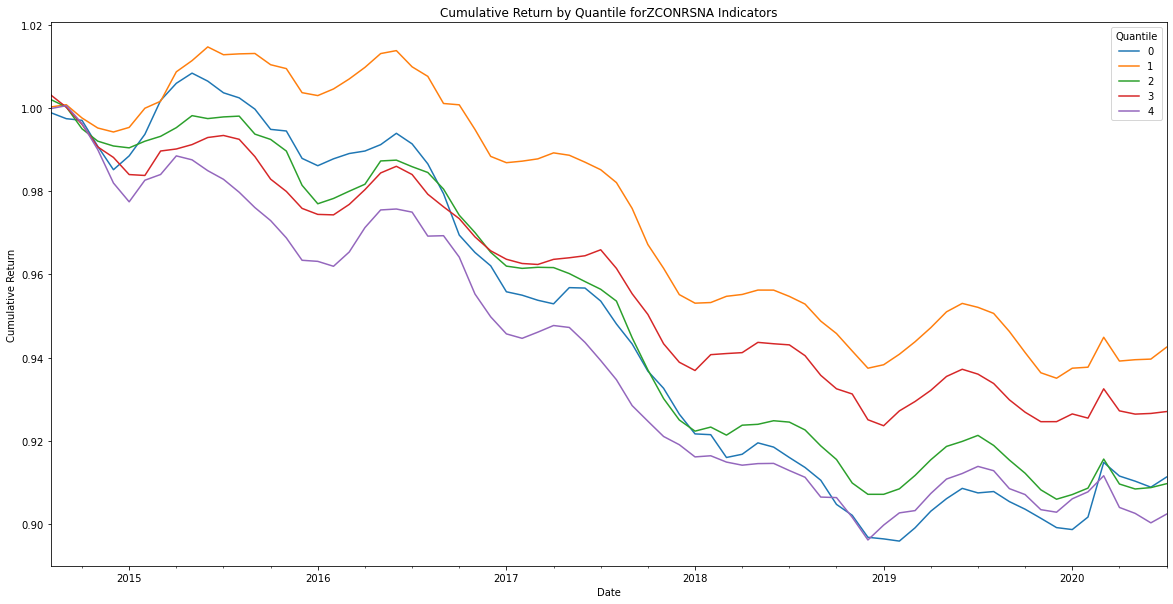

<Figure size 432x288 with 0 Axes>

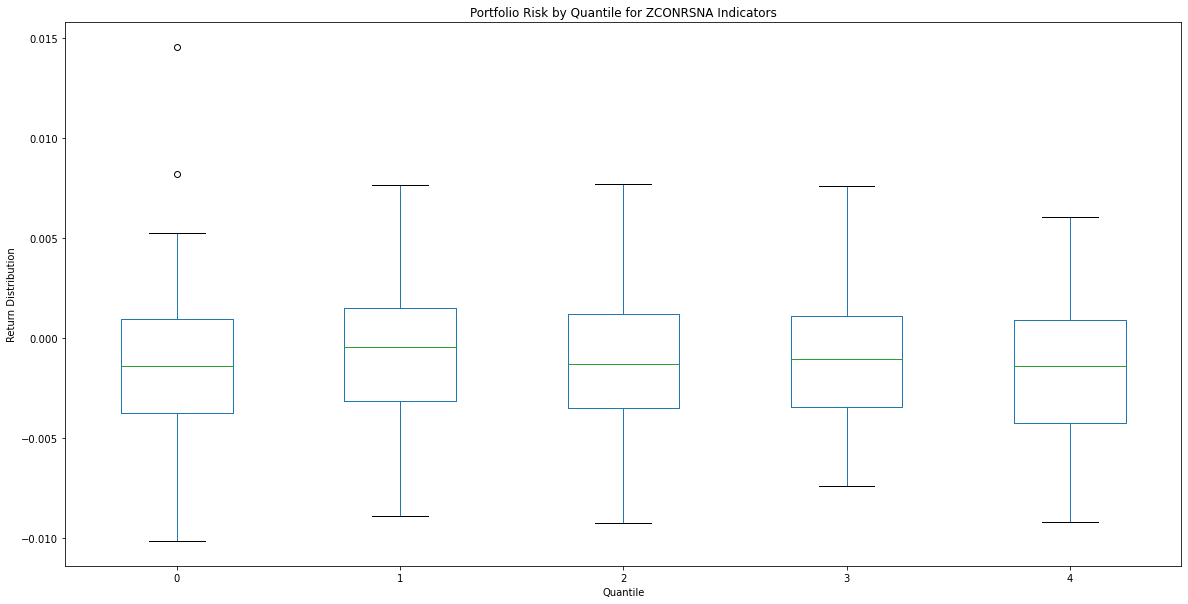

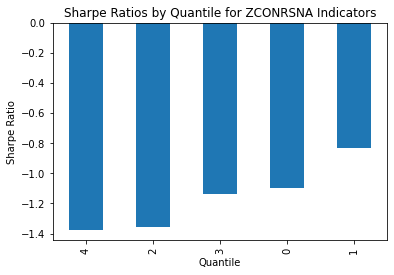

<Figure size 432x288 with 0 Axes>

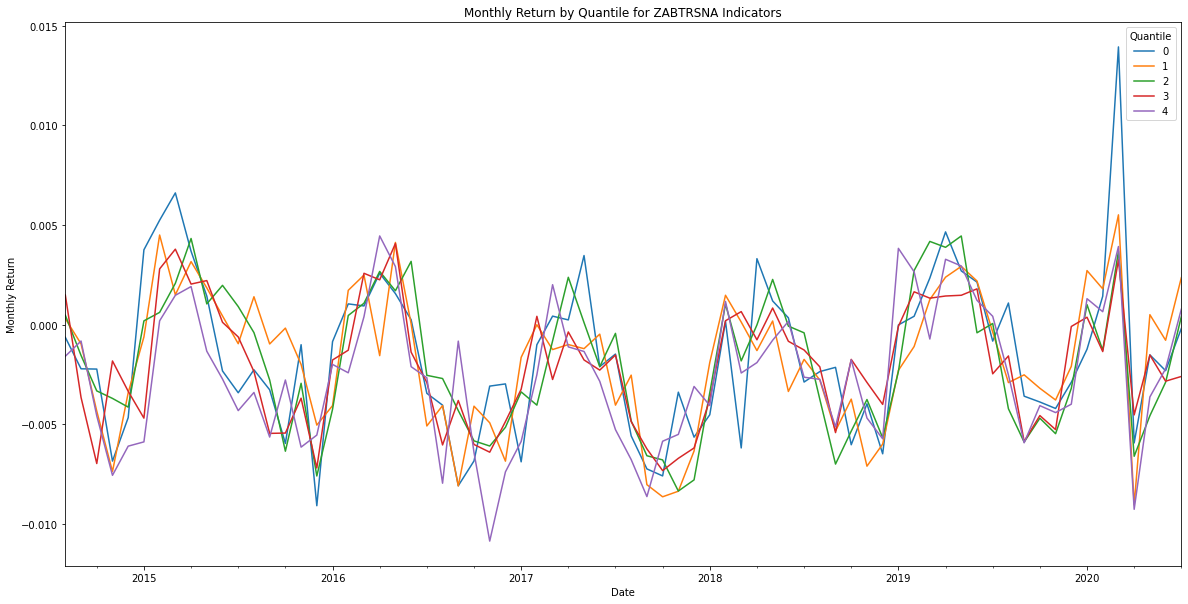

<Figure size 432x288 with 0 Axes>

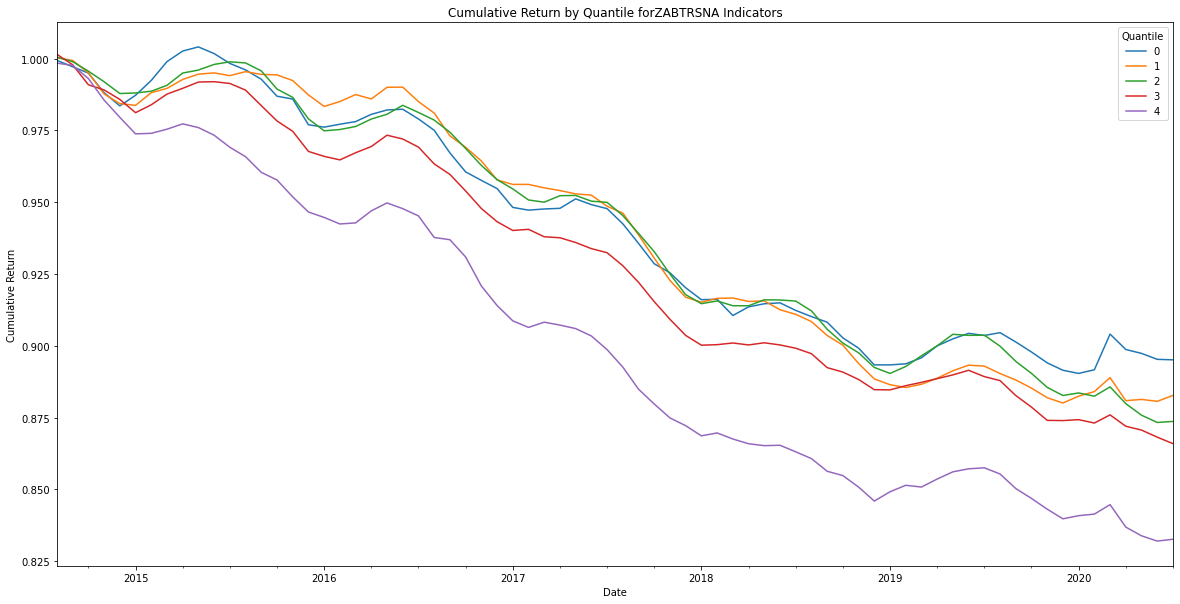

<Figure size 432x288 with 0 Axes>

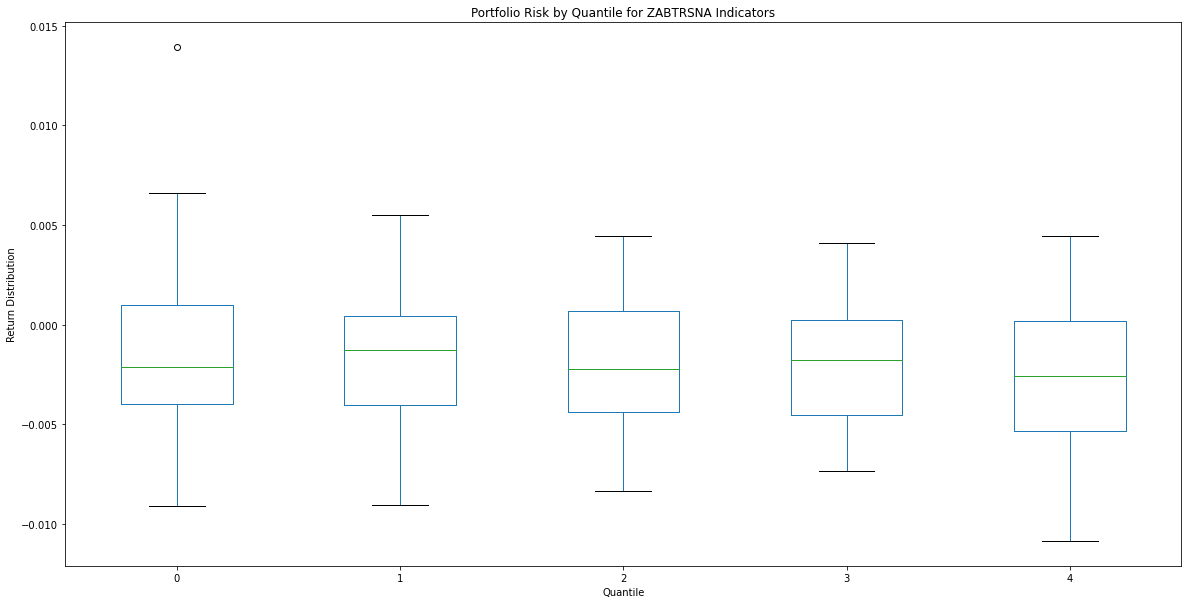

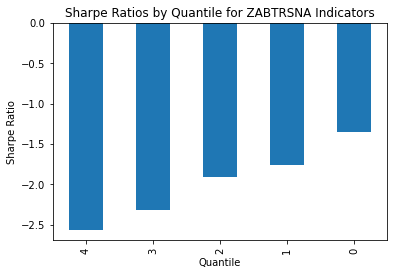

<Figure size 432x288 with 0 Axes>

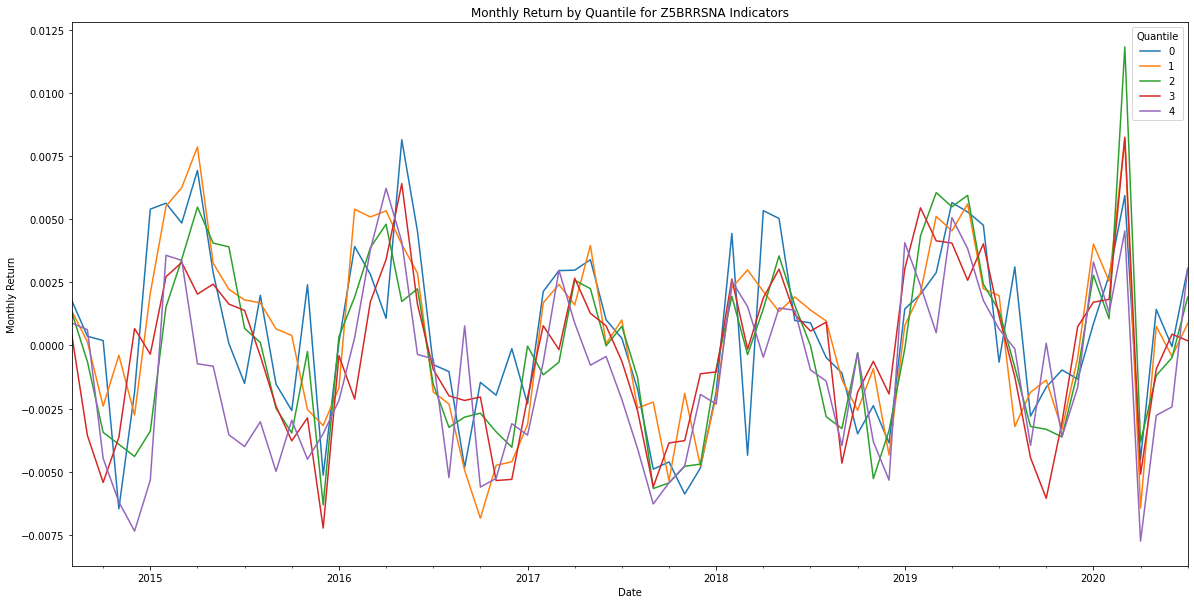

<Figure size 432x288 with 0 Axes>

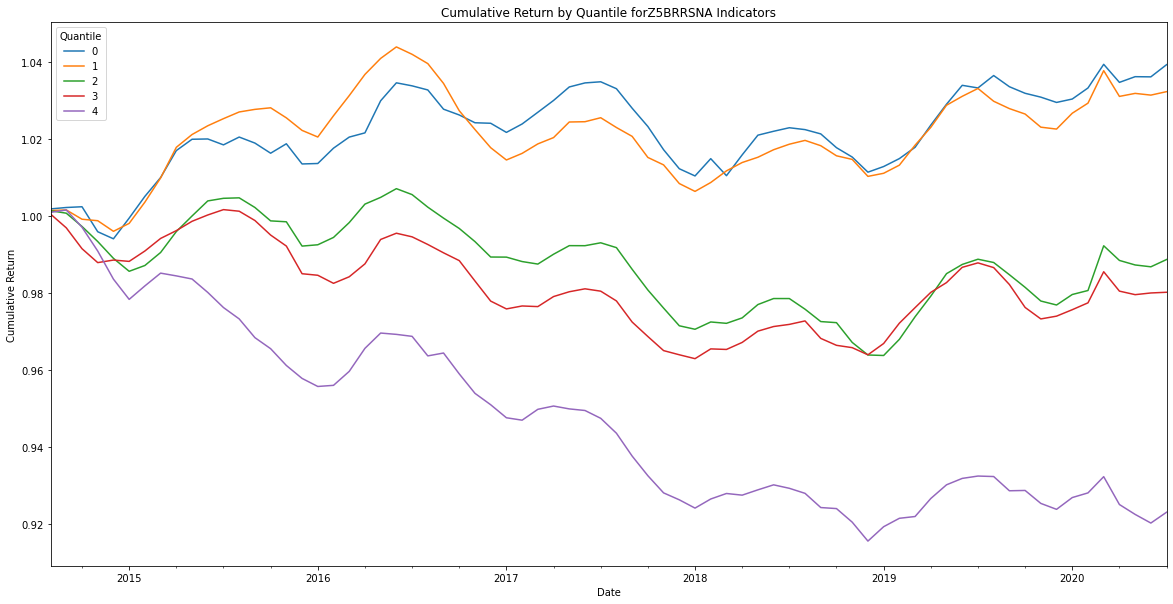

<Figure size 432x288 with 0 Axes>

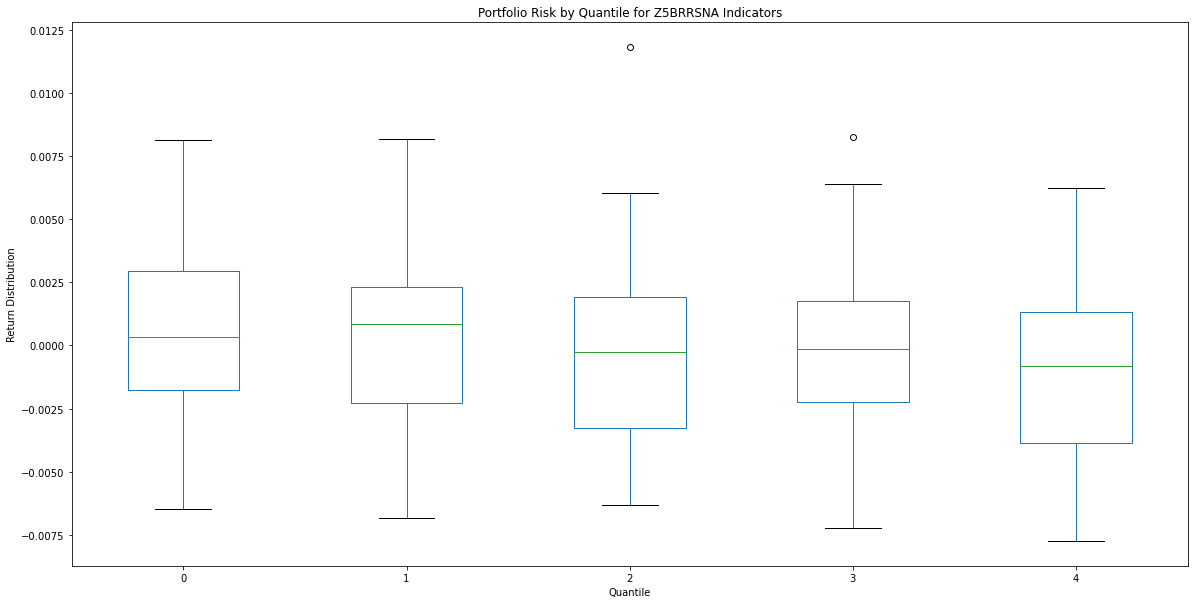

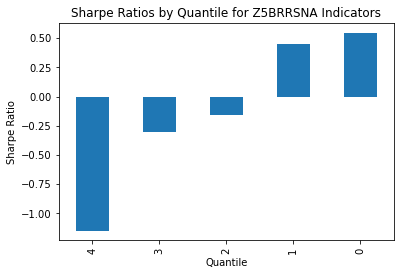

<Figure size 432x288 with 0 Axes>

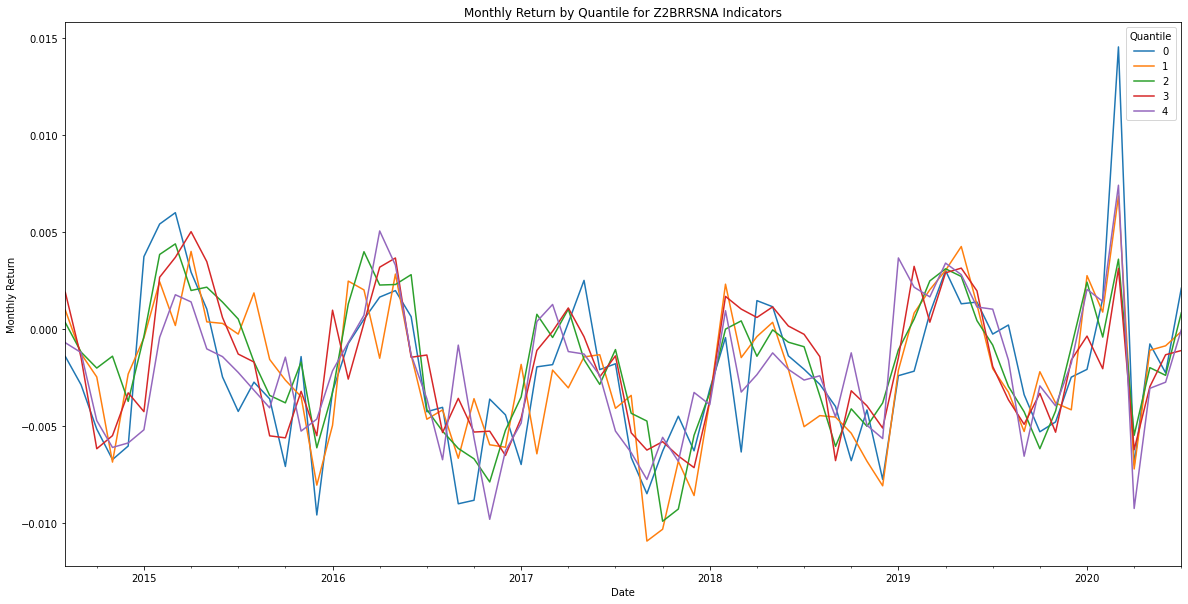

<Figure size 432x288 with 0 Axes>

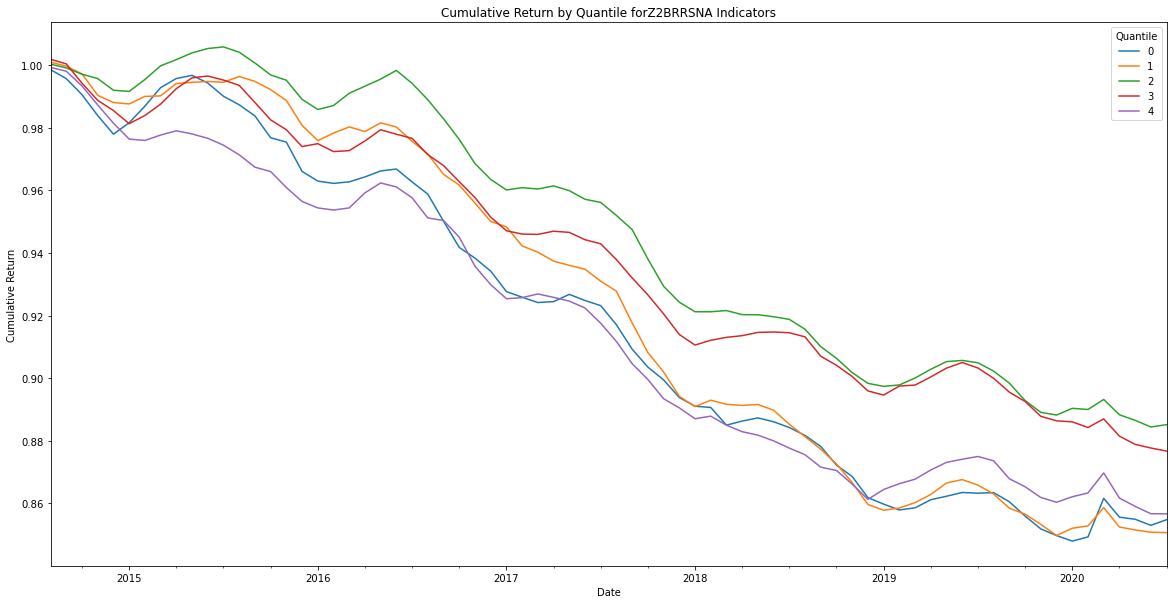

<Figure size 432x288 with 0 Axes>

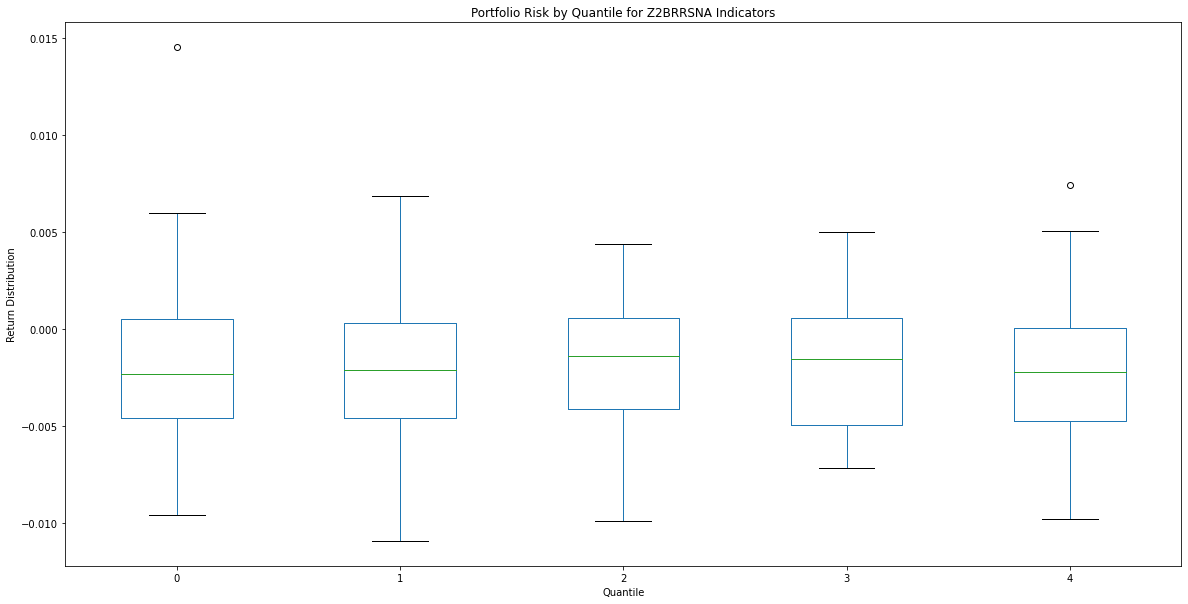

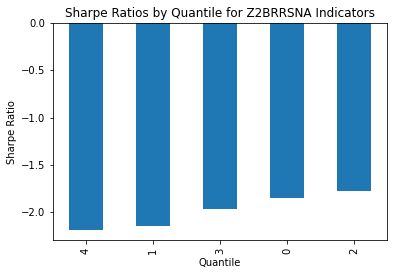

<Figure size 432x288 with 0 Axes>

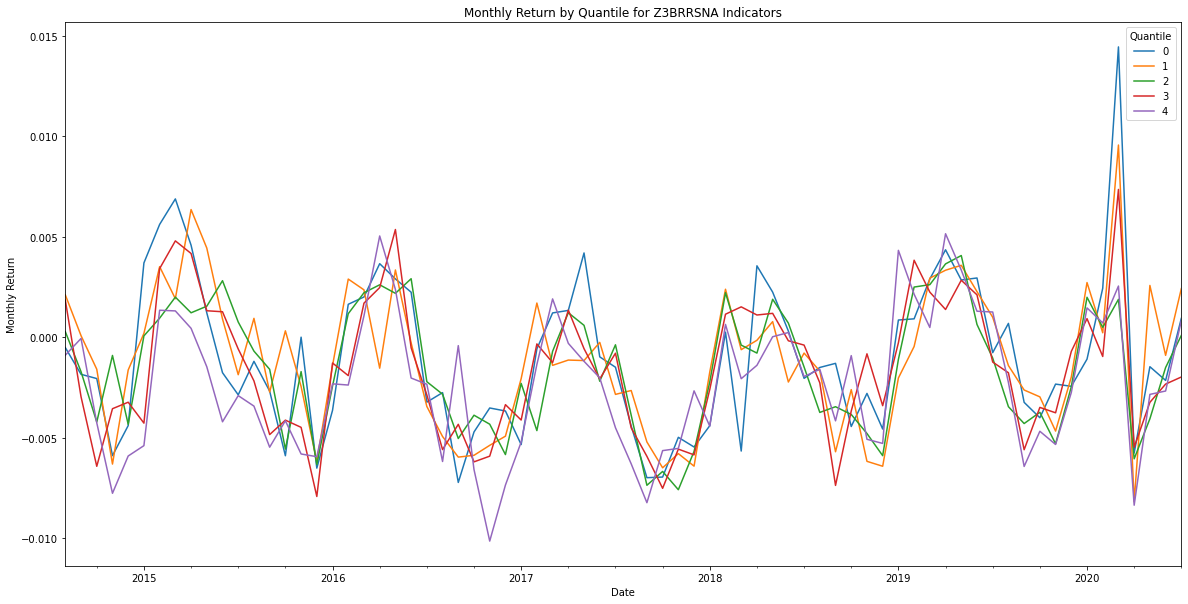

<Figure size 432x288 with 0 Axes>

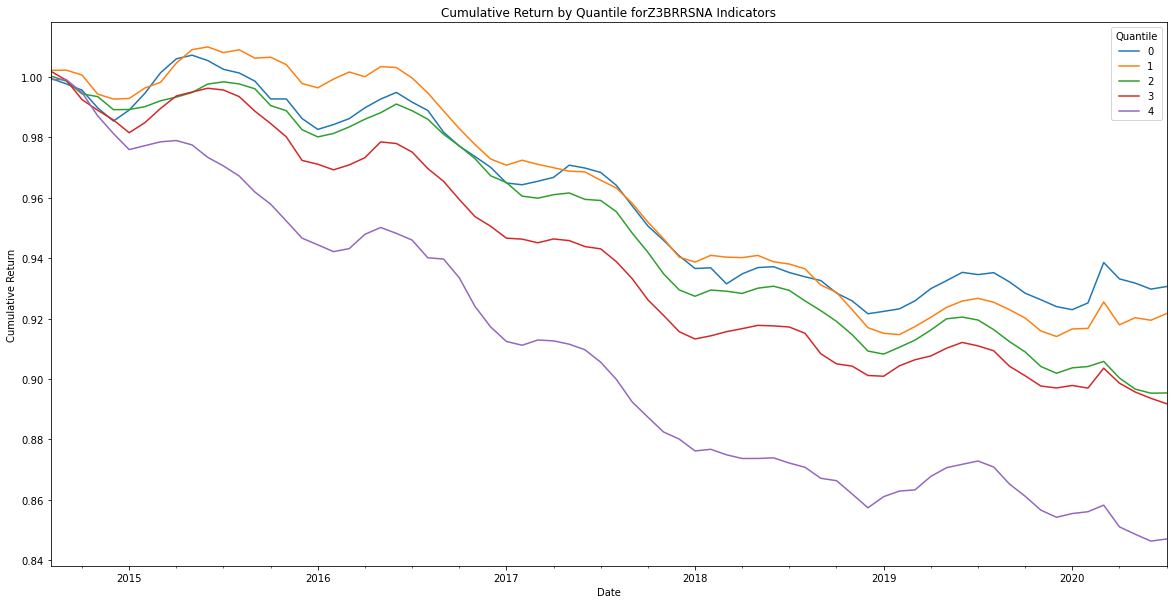

<Figure size 432x288 with 0 Axes>

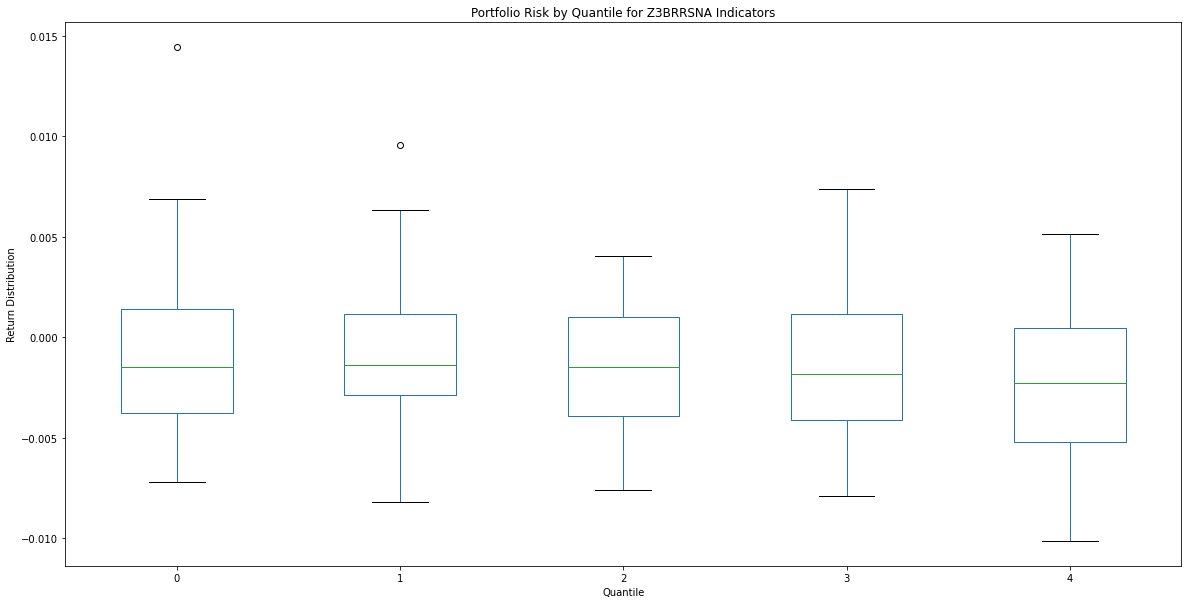

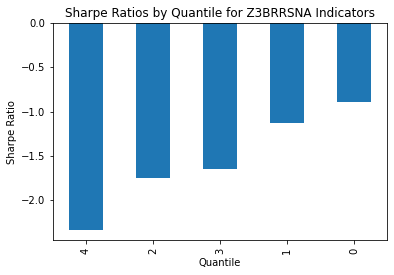

<Figure size 432x288 with 0 Axes>

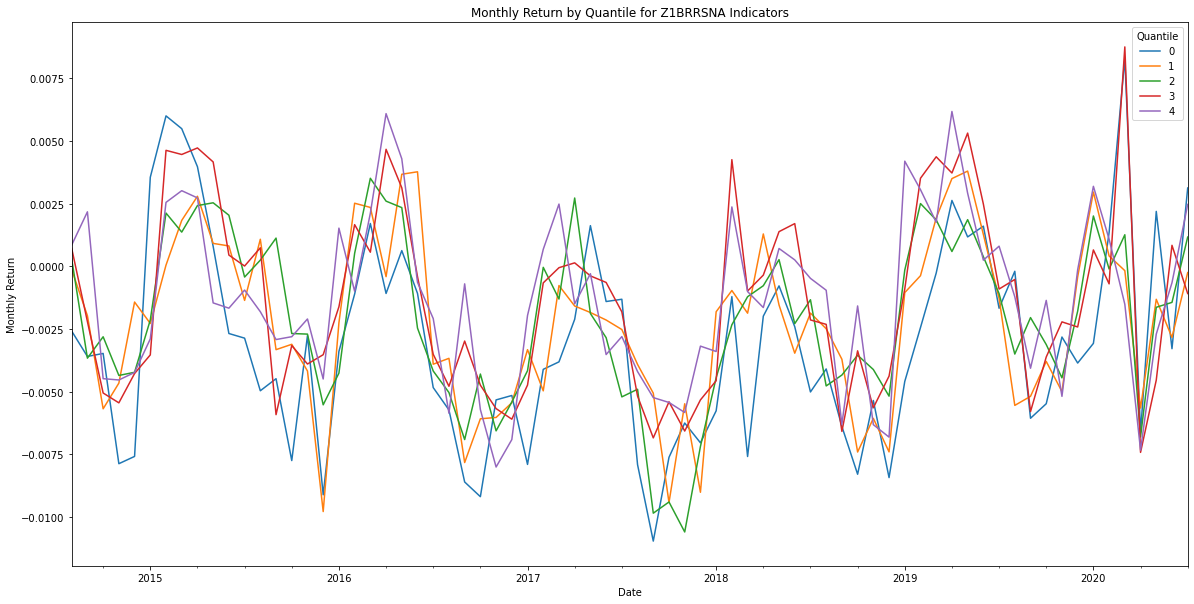

<Figure size 432x288 with 0 Axes>

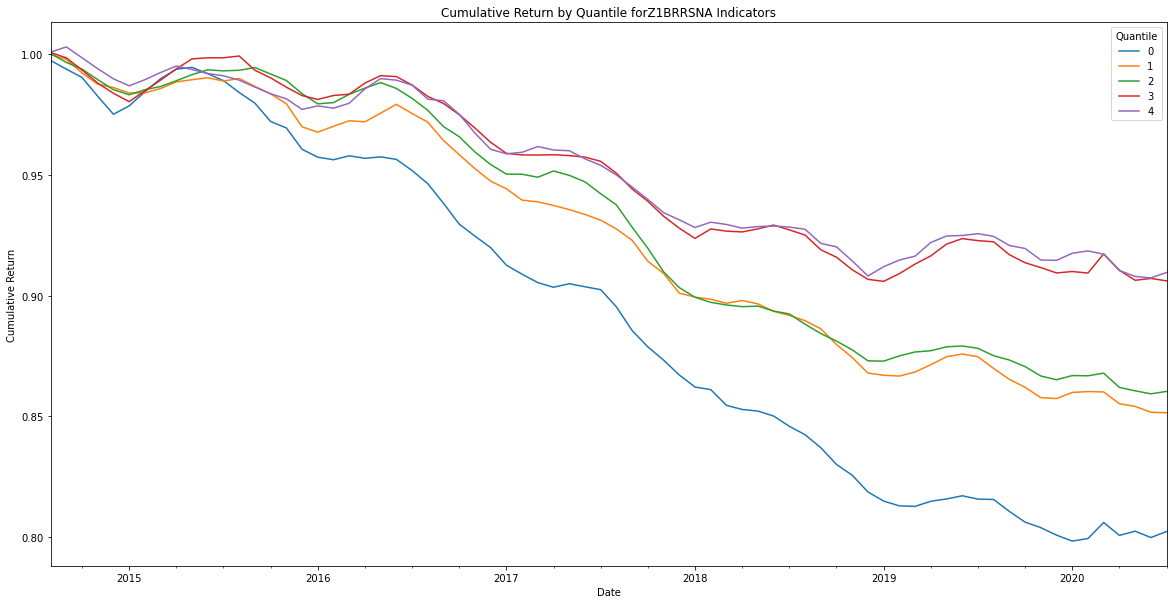

<Figure size 432x288 with 0 Axes>

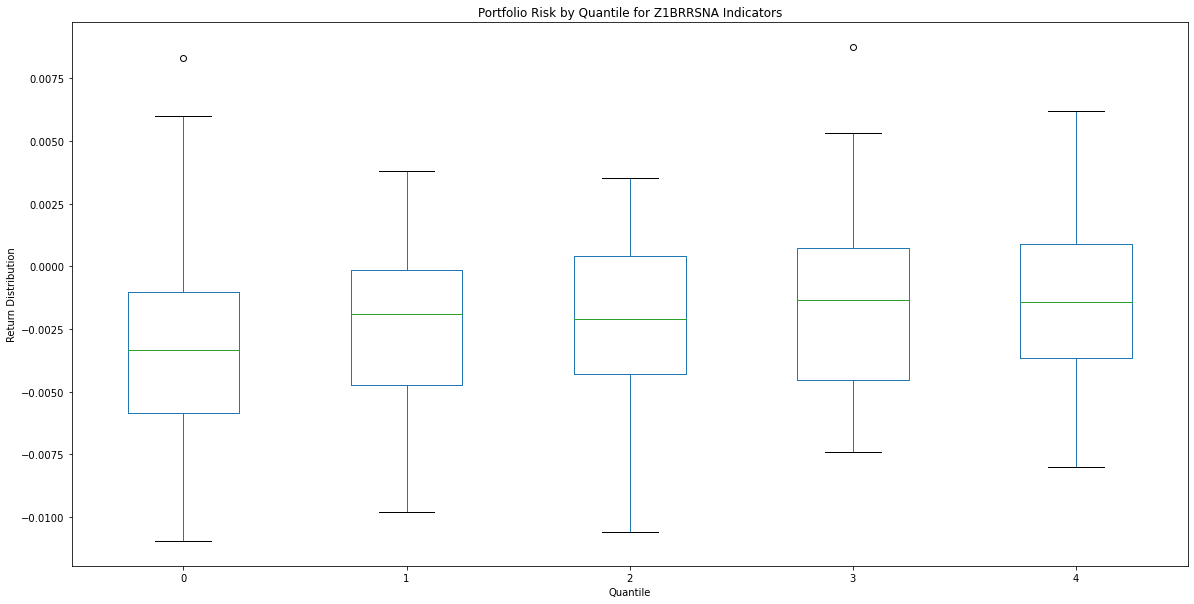

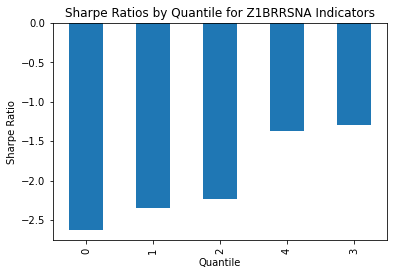

<Figure size 432x288 with 0 Axes>

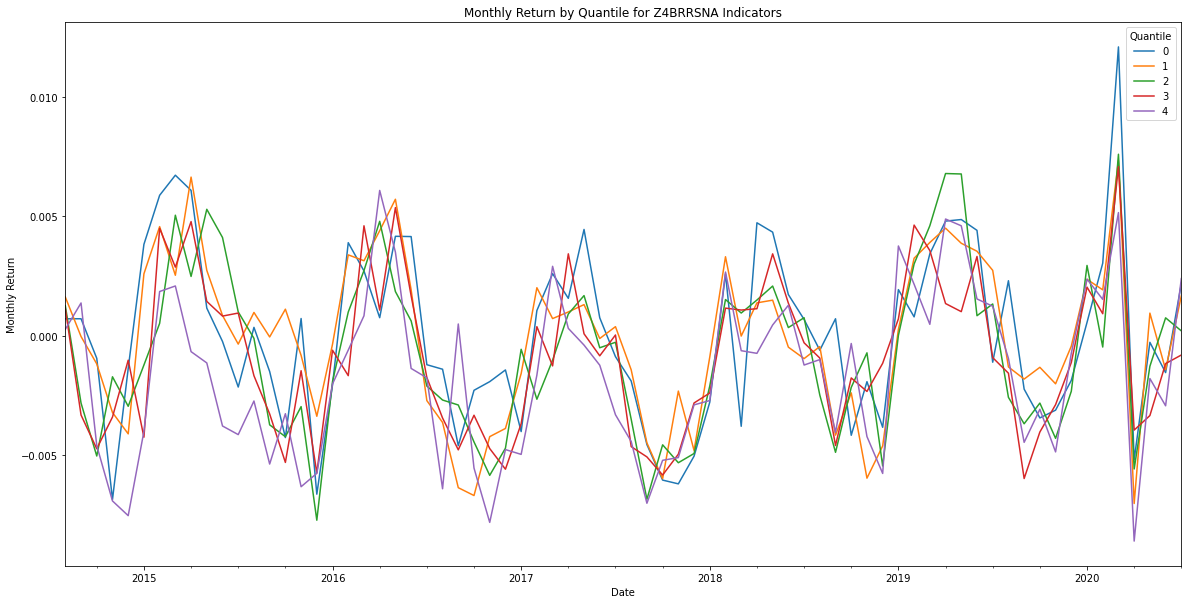

<Figure size 432x288 with 0 Axes>

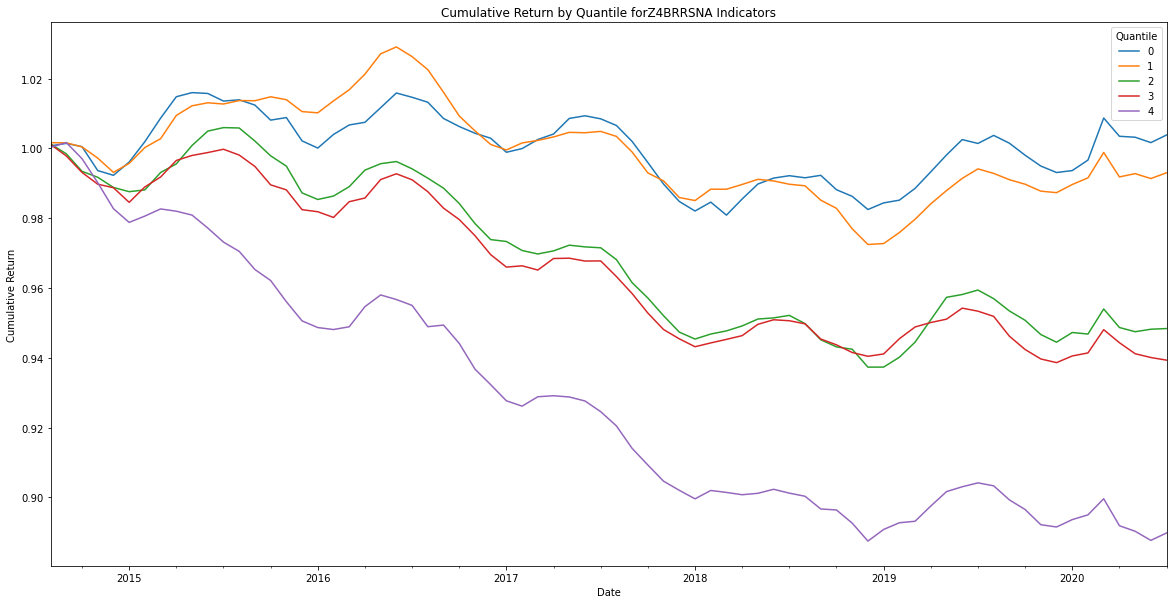

<Figure size 432x288 with 0 Axes>

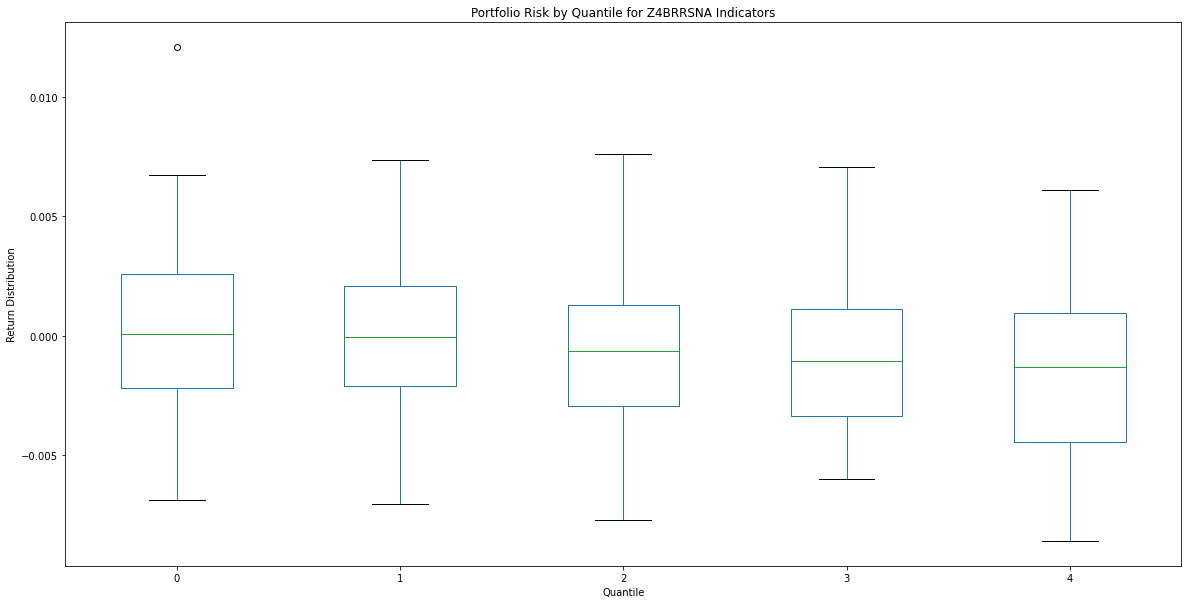

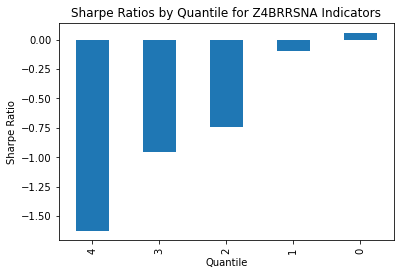

In [46]:
value_results = value(price_indicator,rent_indicator,region)

### Value Function Outputs

In [47]:
#Monthly Standard Deviation
printmd('**Value: Monthly Standard Deviation**')
V_month_stdev = value_results[0].sort_index().style.background_gradient(cmap="summer")
display(V_month_stdev)

**Value: Monthly Standard Deviation**

In [48]:
#Annualized Standard Deviation
printmd('**Value: Annualized Standard Deviation**')
V_annual_stdev = value_results[1].sort_index().style.background_gradient(cmap="coolwarm")
display(V_annual_stdev)

**Value: Annualized Standard Deviation**

In [49]:
#Annualized Sharpe Ratios
printmd('**Value: Sharpe Ratios**')
V_sharpe_ratio = value_results[2].sort_index().style.background_gradient(cmap="autumn")
display(V_sharpe_ratio)

**Value: Sharpe Ratios**

In [50]:
#Save above tables to Excel file
with pd.ExcelWriter('value_all_indicators.xlsx') as writer:
    V_month_stdev.to_excel(writer, sheet_name='Month STDEV')
    V_annual_stdev.to_excel(writer, sheet_name='Annual STDEV')
    V_sharpe_ratio.to_excel(writer, sheet_name='Sharpe Ratios')

In [51]:
#Check processing time for value signal
end_time_3 = time.time()
print("The run time for the value calculations is "+str(round(((end_time_3-start_time_3)/60),2))+" minutes")

The run time for the value calculations is 4.04 minutes


# Combining Signals

**ZALL** home price indicator will be used for combining signals, along with **RSSA** for the rent price indicator
<br>
**Sharpe Ratios** are being used to evaluate the portfolios

In [52]:
#function for calculating and formatting interaction matrix
def interaction_matrix (Momentum, Value):
    '''
    Takes two dataframes, interacts them, and outputs color coded matrix
    Dataframe 1 is Momentum
    Dataframe 2 is Value
    
    '''
    #create interaction matrix for value and momentum
    combined = pd.DataFrame()
    counter = 0
    for i in Momentum:
        z = Value*Momentum[counter]
        combined.insert(counter,'Momentum'+str(counter),z)
        counter = counter + 1

    #create index titles
    index = []
    counter = 0
    for i in Value.index:
        index.append('Value'+str(counter))
        counter = counter + 1
    index = np.asarray(index)

    #set index
    combined = combined.set_index(index)
    combined = combined.style.background_gradient(cmap="summer")
    
    return (combined)

In [53]:
#sharpe ratios per quantile for value, using the ZALL indicator 
sharpe_value_df = value_results[2].sort_index()
ZALL_value = sharpe_value_df["ZALLRSNA"]

In [54]:
#sharpe ratios per quantile for momentum, using the ZALL indicator 
sharpe_momentum_df = momentum_results[2].sort_index()
ZALL_momentum = sharpe_momentum_df["ZALL"]

In [55]:
#First, lets see just the ZALL momentum and value signals by quantile
final = pd.DataFrame([ZALL_momentum, ZALL_value])
final = final.T
final.columns = ["Momentum","Value"]
printmd('**"Value and Momentum Sharpe Ratios by Quantile"**')
final.style.background_gradient(cmap="summer")

**"Value and Momentum Sharpe Ratios by Quantile"**

In [56]:
printmd('**"Value and Momentum Sharpe Ratios by Quantile"**')
interaction_matrix(ZALL_momentum,ZALL_value)

**"Value and Momentum Sharpe Ratios by Quantile"**

# Cumulative Return on same plot for momentum and value

### Define subset to use in plot. Momentum and Value need to be in same data frames.

In [57]:
#define subset to be analyzed
momentum_subset = data[(data['indicator_id']== 'ZATT') & (data['region_type']== 'metro')]
momentum_subset['date'].nunique()

295

In [58]:
#define subset to be analyzed
value_subset = data[(data['indicator_id']== 'RSNA') & (data['region_type']== 'metro')]
value_subset['date'].nunique()

79

In [59]:
#Define the dates available in the value data
value_date = [value_subset['date'].unique()]

In [60]:
#Slice momentum data to only keep rows with same dates as value 
momentum_subset_keep = momentum_subset[np.isin(momentum_subset, value_date).any(axis=1)]

In [61]:
#Check that dates are the same
momentum_subset_keep['date'].unique() == value_subset['date'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

### Run Value and Momentum Calculations on subset

In [62]:
#Value First
##############################################################################################
##############################################################################################

#define price subset
price_subset = momentum_subset_keep
price_subset['date'] = pd.to_datetime(price_subset['date'], infer_datetime_format=True)


##############################################################################################
#define rent subset
rent_subset = value_subset
rent_subset['date'] = pd.to_datetime(rent_subset['date'], infer_datetime_format=True)


##############################################################################################
#define the price + rent subset
price_rent = price_subset.merge(rent_subset[['region_id','date','value']],left_on=['region_id','date'],right_on = ['region_id','date'])

#rename housing price and rent price after merge
price_rent = price_rent.rename(columns={"value_x":"Price","value_y":"Rent"})

#date feature to date time format
price_rent['date'] = pd.to_datetime(price_rent['date'], infer_datetime_format=True)

#Sort by dates
price_rent = price_rent.sort_values(by = ['date'])


##############################################################################################
#calculate rent to price
price_rent["rent_to_price"] = price_rent["Rent"]/price_rent["Price"]

#Set a multi index for time and location 
price_rent = price_rent.set_index(['date','region_id'])['rent_to_price'].unstack(level=1)

##############################################################################################
#calculate monthly change
monthly_change = price_rent.pct_change(1)
monthly_change = pd.DataFrame(monthly_change.stack())#transform into one dimension

##############################################################################################        
#create signal to build portfolios from (6 month change)
price_rent_pct = price_rent.pct_change(6).shift(1) ###change lag of function###

#Rank signals
price_rent_pct.rank(axis = 1)

#transform into one dimension
price_rent_pct = pd.DataFrame(price_rent_pct.stack())

#Name the signal column
price_rent_pct.columns = ['Value Signal']

#drop duplicates
price_rent_pct = price_rent_pct.dropna().drop_duplicates()


##############################################################################################        
#Create quantiles based on the signal. These quantiles are my portfolio's of regions with similar signals
price_rent_pct["Quantile"] =  price_rent_pct.groupby(level='date')["Value Signal"].apply(pd.qcut, q=5, labels=False)

#Append monthly change as Contemporaneous Returns to the value signal by quantile dataframe 
price_rent_pct["Contemporaneous Returns"] = monthly_change

#Lag quantile to avoid look ahead bias
price_rent_pct["Quantile"] = price_rent_pct.groupby(level ='region_id')['Quantile'].shift(0)  ###change here###

#Take average of the Contemporaneous Returns for each date and quantile group
price_rent_pct = price_rent_pct.groupby(['date','Quantile'],as_index = True)['Contemporaneous Returns'].mean()

#transform to multi dimension
price_rent_pct = price_rent_pct.unstack(level= 1)

#cumulative product of quantiles to force quantiles to have same starting point
##############################################################################################
subset_cumret_val = (1+price_rent_pct).cumprod()

#Annualized Sharpe Ratios(return-to-risk ratio)
##############################################################################################
sharpe_ratios_val = ((price_rent_pct.mean() * 12) / (price_rent_pct.std() * np.sqrt(12)))
sharpe_ratios_val = sharpe_ratios_val.sort_values(ascending=False)

In [63]:
#Momentum second
###########################################################################################################

#define subset to be analyzed
subset = momentum_subset_keep

#date feature to datetime format
subset['date'] = pd.to_datetime(subset['date'], infer_datetime_format=True)

# Set a multi index for time and location 
subset = subset.set_index(['date','region_id'])['value'].unstack(level=1)

#Calculate monthly return, equal to MoM percent change. Save as own dataframe
monthly_return = subset.pct_change(1)
monthly_return = pd.DataFrame(monthly_return.stack()) #Transform shape so its one dimension

#Calculate signal that will be used to create quantiles
##############################################################################################
subset_pct = subset.pct_change(6).shift(1) #calculate the 6 month percent change ###CHANGE HERE###
subset_pct.rank(axis=1) #rank the signals so they are in descending order
subset_pct= pd.DataFrame(subset_pct.stack())#stack to one dimension
subset_pct.columns = ['Signal'] #Name the signal column
subset_pct = subset_pct.dropna().drop_duplicates() #drop duplicates


#Create 5 "portfolios" with equal sized groups of regions ranked on signal
##############################################################################################
subset_pct["Quantile"] =  subset_pct.groupby(level='date')["Signal"].apply(pd.qcut, q=5, labels=False)

#Append contemporaneous return to dataframe with quantiles
subset_pct["Contemporaneous Returns"] = monthly_return

#Lag Quantiles to avoid look ahead bias
subset_pct["Quantile"] = subset_pct.groupby(level ='region_id')['Quantile'].shift(0)###CHANGE HERE###

#Take the average of the contemporaneous return for each quantile over time
subset_pct = subset_pct.groupby(['date','Quantile'],as_index = True)['Contemporaneous Returns'].mean()
subset_pct = subset_pct.unstack(level= 1) #unstack to transform shape to multi-dimension
#subset_pct = subset_pct.drop(subset_pct.index[0]) #drop first row since shifted 1 in value


#Monthly returns of the quanitles do not have a common starting point, so they can be hard to compare
#This problem is fixed by taking the cumulative product of each quantile
#The cumulative return is the total change in the investment price over a set time
#This metric assumes the dividends are reinvested each period, and is an aggregate return, not an annualized one

#cumulative product of quantiles
##############################################################################################
subset_cumret_mom = (1+subset_pct).cumprod()
#Annualized Sharpe Ratios(return-to-risk ratio)
##############################################################################################
sharpe_ratios_mom = ((subset_pct.mean() * 12) / (subset_pct.std() * np.sqrt(12)))
sharpe_ratios_mom = sharpe_ratios_mom.sort_values(ascending=False)


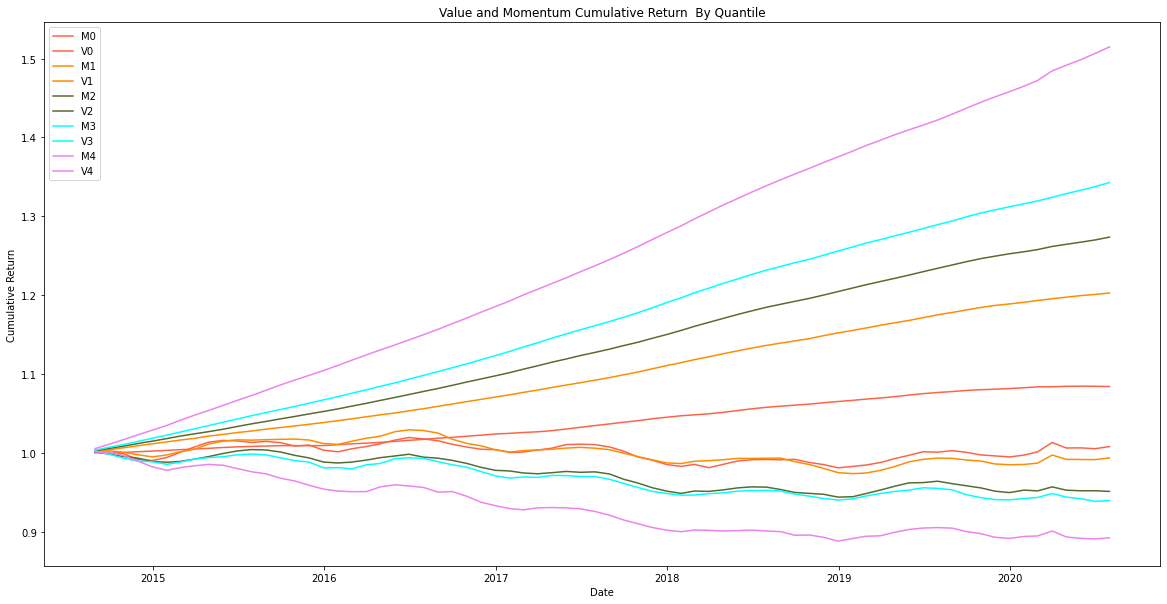

In [64]:
#Plot it!!!!
fig,ax1 = plt.subplots(figsize=(20,10))
quantiles = [0,1,2,3,4]
colors = ['tomato' , 'darkorange', 'darkolivegreen', 'aqua', 'violet']
index = subset_cumret_mom.index
counter = 0

#Loop over each quantile pair for value and momentum and plot cumulative returns
for i in subset_cumret_mom.columns:
    ax1.plot(index, subset_cumret_mom.iloc[:,i], color = colors[counter], label = "M"+ str(quantiles[counter]))
    ax1.plot(index, subset_cumret_val.iloc[:,i], color = colors[counter], label = "V"+str(quantiles[counter]))
    counter = counter + 1

ax1.set_title("Value and Momentum Cumulative Return  By Quantile")
ax1.set_xlabel("Date")
ax1.set_ylabel("Cumulative Return")
ax1.legend()

In [65]:
df = pd.concat([sharpe_ratios_mom,sharpe_ratios_val],axis =1)
df.columns = ['Momentum', 'Value']
df.style.background_gradient(cmap="Oranges")

In [66]:
interaction_matrix(sharpe_ratios_mom,sharpe_ratios_val)

# Shift Rent Comparision
Does shifting the rent one period forward make more sense from a real estate perspective? People buying homes would likely look at the rental prices in a region, then make their decision to go purchase a home.

In [67]:
##############################################################################################
#define price subset
price_subset = momentum_subset_keep
price_subset['date'] = pd.to_datetime(price_subset['date'], infer_datetime_format=True)


##############################################################################################
#define rent subset
rent_subset = value_subset
rent_subset['date'] = pd.to_datetime(rent_subset['date'], infer_datetime_format=True)

##############################################################################################
#define the price + rent subset
price_rent = price_subset.merge(rent_subset[['region_id','date','value']],left_on=['region_id','date'],right_on = ['region_id','date'])

#rename housing price and rent price after merge
price_rent = price_rent.rename(columns={"value_x":"Price","value_y":"Rent"})

#date feature to date time format
price_rent['date'] = pd.to_datetime(price_rent['date'], infer_datetime_format=True)

#Sort by dates
price_rent = price_rent.sort_values(by = ['date'])


##############################################################################################
#calculate rent to price
price_rent["rent_to_price"] = price_rent["Rent"]/price_rent["Price"]

#Set a multi index for time and location 
price_rent = price_rent.set_index(['date','region_id'])['rent_to_price'].unstack(level=1)

##############################################################################################
#calculate monthly change
monthly_change = price_rent.pct_change(1)
monthly_change = pd.DataFrame(monthly_change.stack())#transform into one dimension

##############################################################################################        
#create signal to build portfolios from (6 month change)
price_rent_pct = price_rent.pct_change(6).shift(0) ###change lag of function###

#Rank signals
price_rent_pct.rank(axis = 1)

#transform into one dimension
price_rent_pct = pd.DataFrame(price_rent_pct.stack())

#Name the signal column
price_rent_pct.columns = ['Value Signal']

#drop duplicates
price_rent_pct = price_rent_pct.dropna().drop_duplicates()


##############################################################################################        
#Create quantiles based on the signal. These quantiles are my portfolio's of regions with similar signals
price_rent_pct["Quantile"] =  price_rent_pct.groupby(level='date')["Value Signal"].apply(pd.qcut, q=5, labels=False)

#Append monthly change as Contemporaneous Returns to the value signal by quantile dataframe 
price_rent_pct["Contemporaneous Returns"] = monthly_change

#Lag quantile to avoid look ahead bias
price_rent_pct["Quantile"] = price_rent_pct.groupby(level ='region_id')['Quantile'].shift(1)  ###change here###

#Take average of the Contemporaneous Returns for each date and quantile group
price_rent_pct = price_rent_pct.groupby(['date','Quantile'],as_index = True)['Contemporaneous Returns'].mean()

#transform to multi dimension
price_rent_pct = price_rent_pct.unstack(level= 1)

#cumulative product of quantiles to force quantiles to have same starting point
##############################################################################################
subset_cumret_price = (1+price_rent_pct).cumprod()

#Annualized Sharpe Ratios(return-to-risk ratio)
##############################################################################################
sharpe_ratios_val = ((price_rent_pct.mean() * 12) / (price_rent_pct.std() * np.sqrt(12)))

print("Sharpe Ratios for Value")
sharpe_ratios_val

Sharpe Ratios for Value


Quantile
0.0    0.105803
1.0   -0.090387
2.0   -0.792781
3.0   -0.958216
4.0   -1.552346
dtype: float64

#### Shift Rent 1 period and see if change is signifiant

In [68]:
##############################################################################################
#define price subset
price_subset = momentum_subset_keep
price_subset['date'] = pd.to_datetime(price_subset['date'], infer_datetime_format=True)


##############################################################################################
#define rent subset
rent_subset = value_subset
rent_subset['date'] = pd.to_datetime(rent_subset['date'], infer_datetime_format=True)

##############################################################################################
#define the price + rent subset
price_rent = price_subset.merge(rent_subset[['region_id','date','value']],left_on=['region_id','date'],right_on = ['region_id','date'])

#rename housing price and rent price after merge
price_rent = price_rent.rename(columns={"value_x":"Price","value_y":"Rent"})

#date feature to date time format
price_rent['date'] = pd.to_datetime(price_rent['date'], infer_datetime_format=True)

#Sort by dates
price_rent = price_rent.sort_values(by = ['date'])

############################################################################################################################################################
############################################################################################################################################################
#lag rent one period                                                              ################################################################################################################################################
#This lag may represent the way the market works,                                 ################################################################################################################################################
#Where buyers first look at recent rents for a region,                            ########################################################################################################################
#then make a decision about whether to buy                                        ########################################################################
price_rent['Rent'] = price_rent.groupby(by ='region_id')["Rent"].shift(1)         ##########################################
                                                                                  #####################################
##################################################################################################################################################################################
############################################################################################################################################################

#calculate rent to price
price_rent["rent_to_price"] = price_rent["Rent"]/price_rent["Price"]

#Set a multi index for time and location 
price_rent = price_rent.set_index(['date','region_id'])['rent_to_price'].unstack(level=1)

##############################################################################################
#calculate monthly change
monthly_change = price_rent.pct_change(1)
monthly_change = pd.DataFrame(monthly_change.stack())#transform into one dimension

##############################################################################################        
#create signal to build portfolios from (6 month change)
price_rent_pct = price_rent.pct_change(6).shift(0) ###change lag of function###

#Rank signals
price_rent_pct.rank(axis = 1)

#transform into one dimension
price_rent_pct = pd.DataFrame(price_rent_pct.stack())

#Name the signal column
price_rent_pct.columns = ['Value Signal']

#drop duplicates
price_rent_pct = price_rent_pct.dropna().drop_duplicates()


##############################################################################################        
#Create quantiles based on the signal. These quantiles are my portfolio's of regions with similar signals
price_rent_pct["Quantile"] =  price_rent_pct.groupby(level='date')["Value Signal"].apply(pd.qcut, q=5, labels=False)

#Append monthly change as Contemporaneous Returns to the value signal by quantile dataframe 
price_rent_pct["Contemporaneous Returns"] = monthly_change

#Lag quantile to avoid look ahead bias
price_rent_pct["Quantile"] = price_rent_pct.groupby(level ='region_id')['Quantile'].shift(1)  ###change lag here###

#Take average of the Contemporaneous Returns for each date and quantile group
price_rent_pct = price_rent_pct.groupby(['date','Quantile'],as_index = True)['Contemporaneous Returns'].mean()

#transform to multi dimension
price_rent_pct = price_rent_pct.unstack(level= 1)

#cumulative product of quantiles to force quantiles to have same starting point
##############################################################################################
subset_cumret_price = (1+price_rent_pct).cumprod()

#Annualized Sharpe Ratios(return-to-risk ratio)
##############################################################################################
sharpe_ratios_val_2 = ((price_rent_pct.mean() * 12) / (price_rent_pct.std() * np.sqrt(12)))

print("Sharpe Ratios for Value")
sharpe_ratios_val_2

Sharpe Ratios for Value


Quantile
0.0    0.069878
1.0   -0.181684
2.0   -0.620806
3.0   -1.037505
4.0   -1.840732
dtype: float64

In [69]:
df = pd.concat([sharpe_ratios_val,sharpe_ratios_val_2],axis =1)
df.columns = ['Without Shifting Rent', 'Shift Rent 1']
df.style.background_gradient(cmap="summer")

In [70]:
#Check processing time for full workbook
end_time_final = time.time()
print("The run time for the entire workbook is "+str(round(((end_time_final-start_time)/60),2))+" minutes")

The run time for the entire workbook is 10.45 minutes
